In [0]:
!pip install ijson
!pip install mpld3
!pip install "git+https://github.com/javadba/mpld3@display_fix"

# !pip install -U symspellpy

     |████████████████████████████████| 102kB 2.9MB/s 
     |████████████████████████████████| 798kB 3.4MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=03382f5428c075f1ac43725f130dd599756060c6792b053eb4f1e28b936b949c
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
Successfully built mpld3
  Cloning https://github.com/javadba/mpld3 (to revision display_fix) to /tmp/pip-req-build-gsqrvlzw
  Running command git clone -q https://github.com/javadba/mpld3 /tmp/pip-req-build-gsqrvlzw
  Running command git checkout -b display_fix --track origin/display_fix
  Switched to a new branch 'display_fix'
  Branch 'display_fix' set up to track remote branch 'display_fix' from 'origin'.
  Running command git submodule update --init --recursive -q
  Created wheel for mpld3: filename=mpld3-0.3.1.dev1-cp36-none-any.whl size=116956 sha256=678c31cea1d91a63a91cf79a7ccf0fc233d7b2f516d51b83516633b7e7fd236f
  Stor

In [0]:
!pip install tensorflow

In [0]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 36kB/s 
     |████████████████████████████████| 3.8MB 61.1MB/s 
     |████████████████████████████████| 450kB 65.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=6ce9642f57e13690a26f54ef26a7a64186d4ec951789b3a4b9c0390dcc1957db
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation

In [1]:
import pandas as pd
import numpy as np
import re
import random
import ijson
import tensorflow as tf
import ast 
import gensim # for word2vec word embedding
import mpld3 # for interactive matplotlib 
from mpld3 import plugins

#from symspellpy.symspellpy import SymSpell
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer #for vectorizing categorial features
from sklearn.decomposition import PCA
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import CSVLogger
from collections import Counter 
 
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')

import os

import pickle #for saving and loading tokenizer

import h5py

import gensim

#from usda.client import UsdaClient


ModuleNotFoundError: No module named 'ijson'

In [0]:
 # mount google drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
directory = '/content/drive/My Drive/data_science/recipes'

### Read ingredients only data  
* Data from Kaggle (https://www.kaggle.com/kaggle/recipe-ingredients-dataset/data#train.json)  
* For our purposes, we'll use both the train and test data 3

In [0]:
# open file 
file_name = directory + '/recipe-ingredients-dataset/train.json'

with open(file_name, 'r') as f:
  objects = ijson.items(f, 'item')
  data = list(objects)

# get the ingredients and cuisine
cuisine = []
ingredients = []
for item in data:
  cuisine.append(item['cuisine'])
  ingredients.append(item['ingredients'])

# store in DataFrame
df = pd.DataFrame({'cuisine' : cuisine, 'ingredients' : ingredients})

# get a list with both cuisinie and ingredients together
ing_cuisine = []
for idx, item in enumerate(ingredients):
  c = cuisine[idx]
  new_item = item + [c]
  ing_cuisine.append(new_item)

In [0]:
# does it have any special characters? ( I don't think so)

maximum number of ingredients in a given recipe:  65


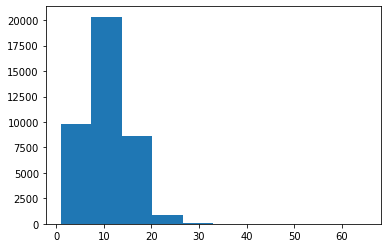

In [0]:
# find the number of ingredients in each recipe
ing_len = [len(x) for x in ingredients]

print('maximum number of ingredients in a given recipe: ', max(ing_len))
plt.hist(ing_len)
plt.show()

### word2vec

In [0]:
# word2vec

# train word2vec
embedding_dim=300
model=gensim.models.Word2Vec(ingredients, size=embedding_dim, window=30, min_count=0)

In [0]:
model.wv.most_similar('steak',topn=15,restrict_vocab=None)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('braggs liquid aminos', 0.9514964818954468),
 ('brisket', 0.9448501467704773),
 ('liquid', 0.9442864060401917),
 ('pork chops', 0.9412922263145447),
 ('beni shoga', 0.9394987225532532),
 ('coca-cola', 0.9393748044967651),
 ('pork ribs', 0.9372859001159668),
 ('Truvía® natural sweetener', 0.9282853603363037),
 ('string beans', 0.9276465773582458),
 ('cooked brisket', 0.9274604916572571),
 ('other vegetables', 0.926060676574707),
 ('thin spaghetti', 0.9244283437728882),
 ('shrimp shells', 0.9234750270843506),
 ('white arborio rice', 0.9234488606452942),
 ('chili pepper flakes', 0.9234393239021301)]

In [0]:
model.similar_by_vector(model['lamb']+model['asparagus']-model['steak'],topn=15,restrict_vocab=None)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('nonfat chicken broth', 0.9486076831817627),
 ('yellow crookneck squash', 0.944515585899353),
 ('fennel bulb', 0.9438149929046631),
 ('hot red pepper flakes', 0.9284546971321106),
 ('Italian parsley leaves', 0.9115148782730103),
 ('fennel', 0.9077150821685791),
 ('country loaf', 0.9003949165344238),
 ('mussels', 0.8965507745742798),
 ('gremolata', 0.8962435126304626),
 ('fresh rosemary', 0.8857574462890625),
 ('rosemary sprigs', 0.8855469226837158),
 ('fresh marjoram', 0.8855406045913696),
 ('small pasta', 0.8829182982444763),
 ('French lentils', 0.8786950707435608),
 ('swiss chard', 0.8774094581604004)]

In [0]:
# I could use categories on this word2vec

In [0]:
# word2vec using cuisine and ingredients together

# train word2vec
embedding_dim=300
model=gensim.models.Word2Vec(ing_cuisine, size=embedding_dim, window=30, min_count=0)

In [0]:
model.similar_by_vector(model['chicken'], topn = 15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('chicken', 1.0),
 ('eye of round steak', 0.831078290939331),
 ('minced meat', 0.8276969194412231),
 ('hot pepper', 0.8261210918426514),
 ('Mo Qua', 0.8257550001144409),
 ('homemade stock', 0.8147190809249878),
 ('dried shallots', 0.8131254315376282),
 ('rice', 0.8113541603088379),
 ('chicken stock', 0.8105160593986511),
 ('chicken stock cubes', 0.8033434152603149),
 ('stew', 0.8013942837715149),
 ('chicken thighs', 0.8008883595466614),
 ('spices', 0.7983951568603516),
 ('bay leaves', 0.7882607579231262),
 ('red kidney beans', 0.7866320610046387)]

In [0]:
model.similar_by_vector(model['chicken'] + model['korean'],topn=15)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('korean', 0.9552078247070312),
 ('Gochujang base', 0.904151439666748),
 ('Korean chile flakes', 0.8835249543190002),
 ('sesame oil', 0.87874436378479),
 ('rice wine', 0.8732597827911377),
 ('toasted sesame seeds', 0.8533831834793091),
 ('sandwich steak', 0.8467057347297668),
 ('kimchi', 0.8445457220077515),
 ('chinese', 0.8438355922698975),
 ('soybean paste', 0.8401002287864685),
 ('ramen noodles', 0.8393868207931519),
 ('japanese', 0.8365871906280518),
 ('brown rice vinegar', 0.8265631198883057),
 ('toasted sesame oil', 0.826267659664154),
 ('soybean sprouts', 0.8200647830963135)]

In [0]:
# gloVe? 
!pip install glove_python
import glove

In [0]:
#importing the glove library
from glove import Corpus, Glove
# creating a corpus object
corpus = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(ing_cuisine, window=30)


In [0]:
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components
glove = Glove(no_components=300, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
#glove.save('glove.model')

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [0]:
glove.most_similar('chicken')

[('chicken thighs', 0.7660484469267349),
 ('yellow onion', 0.7660420579410594),
 ('chicken stock', 0.7501534693797555),
 ('sauce', 0.732409851584895)]

In [0]:
glove.most_similar('lamb')

[('lentils', 0.7088676340805032),
 ('lamb shoulder', 0.7057364961743225),
 ('garbanzo beans', 0.6999266932307425),
 ('ras el hanout', 0.6918884404657374)]

In [0]:
glove.most_similar('asparagus')

[('cremini mushrooms', 0.8375173259536696),
 ('linguine', 0.8119749181554341),
 ('pancetta', 0.8101177466581373),
 ('fresh rosemary', 0.7969401439680329)]

In [0]:
# word analogy 

# get embedded vector of a word
def get_vector(word):
  idx = glove.dictionary[word]
  return glove.word_vectors[idx]

In [0]:
v = get_vector('chicken') + get_vector('korean')

In [0]:
# find the word with minimum distance to a given vector 

def closest_words(vector, n):
  # find n-number of words that are closest to given vector 

  # compute distance^2 
  d= np.square(glove.word_vectors - v).sum(axis = 1) 
  indices = np.argsort(d)[:n]

  return [glove.inverse_dictionary[idx] for idx in indices]

In [0]:
closest_words(v, 5)

['korean', 'sesame oil', 'scallions', 'toasted sesame seeds', 'sesame seeds']

In [0]:
#glove.save(directory + '/glove.model')

### NMF


In [0]:
len(ing_cuisine)

39774

In [0]:
# create a matrix with rows: ingredients / cuisine and columns: recipes
# Will end up with a binary matrix (1 if ingredient/ cuisine was present in recipe, and 0 else)



In [0]:
flattened = [item for sublist in ing_cuisine for item in sublist]

In [0]:
flattened = list(set(flattened))

In [0]:
print('number of ingredients: ', len(flattened))
print('number of recipes: ', len(ing_cuisine))

number of ingredients:  6734
number of recipes:  39774


In [0]:
# encode ingredients
ing_dict = {idx:x for idx, x in enumerate(flattened)}

# find reverse of dictionary
ing_dict_reverse = {value:key for key, value in ing_dict.items()}

In [0]:
M = np.zeros((len(flattened), len(ing_cuisine)))
for i, recipe in enumerate(ing_cuisine):
  for ingredient in recipe:
    j = ing_dict_reverse[ingredient]
    M[j,i] = 1

In [0]:
from sklearn.decomposition import NMF

In [0]:
model = NMF(n_components=300)
W = model.fit_transform(M)
H = model.components_

In [0]:
# save the models

np.savetxt(directory + '/NMF_W.csv', W)
np.savetxt(directory + '/NMF_H.csv', H)

In [0]:
W1 = np.loadtxt(directory + '/NMF_W.csv')
H1 = np.loadtxt(directory + '/NMF_H.csv')

In [0]:
M_approx =np.matmul(W,H)

In [0]:
ing_cuisine[104]

['cooking spray',
 'garlic cloves',
 'sliced green onions',
 'chile paste',
 'salt',
 'fresh lime juice',
 'sugar',
 'flank steak',
 'corn tortillas',
 'lower sodium soy sauce',
 'dark sesame oil',
 'cabbage',
 'korean']

In [0]:
ing = np.argsort(M_approx[:,104])

# print the to 10 recommended ingredientts
for item in ing[-20:]:
  print(ing_dict[item])

flank steak
dark brown sugar
garlic salt
toasted sesame seeds
peeled fresh ginger
yellow bell pepper
mexican
kimchi
dark sesame oil
Gochujang base
low sodium soy sauce
korean
corn tortillas
cabbage
sugar
garlic cloves
salt
cooking spray
fresh lime juice
sliced green onions


In [0]:
# say I want to cook korean style chicken 


# look for other recipes with highest similarity score
# look at recommendatioins for other similar recipes 

# compute cosine similarity between mine and all recipes
new_user = np.zeros((len(flattened),1))

# input ingredients that I know I want
user_ing = ['korean', 'chicken', 'sesame seeds', 'scallions']
for item in user_ing:
  idx = ing_dict_reverse[item]
  new_user[idx,0] = 1


In [0]:
# compute cosine similarity with all the recipes

sim = np.matmul(M.T, new_user)

magnitude_M = np.sqrt(np.sum(np.square(M), axis = 0))
magnitude_ing = np.sqrt(np.sum(np.square(new_user)))

#sim = sim/(magnitude_M * magnitude_ing)

In [0]:
norm = np.reciprocal((magnitude_M * magnitude_ing).reshape(-1,1))

In [0]:
sim_user = np.multiply(sim, norm)

In [0]:
sim_user = sim_user.flatten()

In [0]:
sim_sort = np.argsort(sim_user)

In [0]:
# look at 10 most similar users 
# print the 10 most recommended items 
rec_list = []
for item in sim_sort[-10:]:
  print(item, sim_user[item])
  # print the to 10 recommended ingredients
  print('RECOMMENDED INGREDIENTS')
  rec = np.argsort(M_approx[:,item])
  for i in rec[-10:]:
    print(ing_dict[i]) 
  # print the top 10 actual ingredients
  print('ACTUAL INGREDIENTS')
  rec = np.argsort(M[:,item])
  for i in rec[-10:]:
    print(ing_dict[i])
    rec_list.append(ing_dict[i])

4045 0.4743416490252569
RECOMMENDED INGREDIENTS
kimchi
Gochujang base
korean
sesame seeds
scallions
chicken stock
soy sauce
vegetable oil
garlic cloves
mirin
ACTUAL INGREDIENTS
scallions
soy sauce
garlic cloves
chicken drumsticks
mirin
sesame seeds
daikon
chicken stock
vegetable oil
korean
17736 0.4743416490252569
RECOMMENDED INGREDIENTS
Gochujang base
korean
sesame oil
sesame seeds
red pepper flakes
brown sugar
water
garlic cloves
soy sauce
scallions
ACTUAL INGREDIENTS
brown sugar
scallions
garlic cloves
sesame seeds
red pepper flakes
korean
sesame oil
firm tofu
soy sauce
water
17501 0.4743416490252569
RECOMMENDED INGREDIENTS
napa cabbage
toasted sesame seeds
kimchi
Gochujang base
white vinegar
korean
chopped garlic
ginger
sesame seeds
scallions
ACTUAL INGREDIENTS
hot red pepper flakes
white vinegar
asian fish sauce
korean
chopped garlic
sesame seeds
napa cabbage
ginger
asian pear
scallions
38132 0.4743416490252569
RECOMMENDED INGREDIENTS
toasted sesame seeds
kimchi
Gochujang base
ses

In [0]:
counts

Counter({'Gochujang base': 1,
         'Knorr® Pasta Sides™ - Butter & Herb': 1,
         'asian fish sauce': 1,
         'asian pear': 1,
         'bacon': 1,
         'basil mayonnaise': 1,
         'boneless chicken breast': 1,
         'brown sugar': 1,
         'butter': 1,
         'carrots': 1,
         'chicken': 2,
         'chicken drumsticks': 1,
         'chicken stock': 1,
         'chili paste': 1,
         'chopped garlic': 2,
         'cooking wine': 1,
         'daikon': 1,
         'dry pasta': 1,
         'eggs': 1,
         'figs': 2,
         'firm tofu': 1,
         'garlic': 1,
         'garlic cloves': 3,
         'ginger': 2,
         'grapeseed oil': 1,
         'honey': 1,
         'hot red pepper flakes': 1,
         'kimchi': 2,
         'korean': 10,
         'low fat reduced sodium pasta sauce': 2,
         'low-fat crème fraîche': 2,
         'mesquite flavored seasoning mix': 1,
         'minced garlic': 1,
         'mirin': 1,
         'napa cabbage': 

In [0]:
sorted_rec = sorted(rec_list,key=rec_list.count, reverse = True)
rec = [] 

for item in sorted_rec:
  if item not in rec:
    rec.append(item)


In [0]:
rec # this is a list of ingredients recommended ordered starting with the most frequently recommended ingredient. 

['korean',
 'scallions',
 'sesame seeds',
 'soy sauce',
 'sesame oil',
 'garlic cloves',
 'vegetable oil',
 'chopped garlic',
 'ginger',
 'salt',
 'kimchi',
 'chicken',
 'low-fat crème fraîche',
 'figs',
 'low fat reduced sodium pasta sauce',
 'chicken drumsticks',
 'mirin',
 'daikon',
 'chicken stock',
 'brown sugar',
 'red pepper flakes',
 'firm tofu',
 'water',
 'hot red pepper flakes',
 'white vinegar',
 'asian fish sauce',
 'napa cabbage',
 'asian pear',
 'butter',
 'bacon',
 'Gochujang base',
 'dry pasta',
 'carrots',
 'chili paste',
 'sake',
 'onions',
 'mesquite flavored seasoning mix',
 'red pepper',
 'rice vinegar',
 'honey',
 'grapeseed oil',
 'boneless chicken breast',
 'unsalted chicken stock',
 'oil',
 'sugar',
 'potatoes',
 'garlic',
 'persian cucumber',
 'minced garlic',
 'turkey thigh',
 'basil mayonnaise',
 'cooking wine',
 'Knorr® Pasta Sides™ - Butter & Herb',
 'short rib',
 'short-grain rice',
 'eggs']

### Association rule mining

In [0]:
!pip install efficient-apriori

In [0]:
from efficient_apriori import apriori

In [0]:
# change data format for apriori algorithm 
ing_list = [tuple(item) for item in ing_cuisine]

<b> minimum support, minimum confidence </b>  
* Apriori algorithm requires the user to specify minimum support and minimum confidence  
* Try to get an idea of the support of ingredients   
* Try to get an idea of the confidence 

In [0]:
# get the list of ingredients
ingredients = [item for sublist in ing_list for item in sublist]

# count occurrence of ingredients
ing_count = Counter(ingredients)

# sort ingredients in order of decreasing frequency 
ing_by_count = [k for k, v in sorted(ing_count.items(), key = lambda item:item[1])]
ing_by_count.reverse()

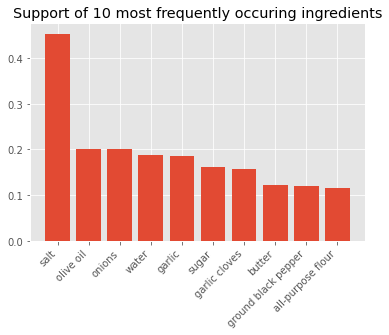

In [0]:
#plot the support of 10 most frequently occurring ingredients
plt.bar(ing_by_count[:10], [ing_count[item]/len(ing_list) for item in ing_by_count[:10]])
plt.xticks(list(range(10)), ing_by_count[:10], ha = 'right', rotation=45)
plt.title('Support of 10 most frequently occuring ingredients')
plt.show()

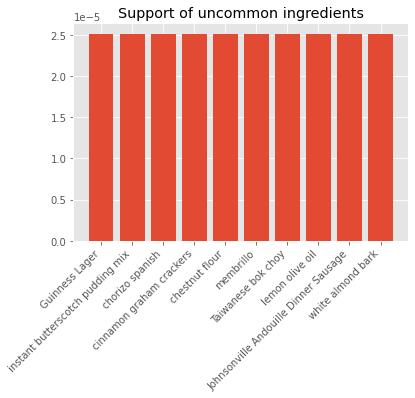

In [0]:
#plot the 10 most rarely occurring ingredients
# use support, instead of frequency 
plt.bar(ing_by_count[-10:], [ing_count[item]/len(ing_list) for item in ing_by_count[-10:]])
plt.xticks(list(range(10)), ing_by_count[-10:], ha = 'right', rotation=45)
plt.title('Support of uncommon ingredients')
plt.show()

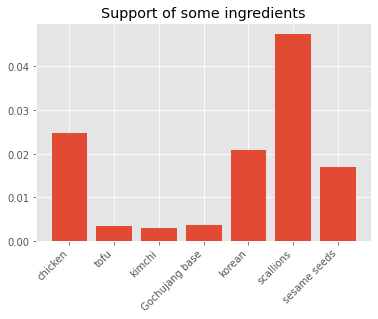

In [0]:
# support of ingredients that I think should be included

my_ingredients = ['chicken','tofu','kimchi', 'Gochujang base', 'korean', 'scallions', 'sesame seeds']
plt.bar(my_ingredients, [ing_count[item]/len(ing_list) for item in my_ingredients])
plt.xticks(list(range(len(my_ingredients))), my_ingredients, ha = 'right', rotation=45)
plt.title('Support of some ingredients')
plt.show()

In [0]:
# what are some ingredients whose support value is around 0.01? 0.005? 0.001?
support = 0.001
freq = support * len(ing_list)
ingredients_support = [item for item in ing_by_count if ing_count[item] <= freq + 10 and ing_count[item] >= freq -10 ]
print(ingredients_support)

['organic vegetable broth', 'salad greens', 'file powder', 'rocket leaves', 'ground round', 'cod fillets', 'colby jack cheese', 'pitted date', 'tapioca flour', 'frozen spinach', 'green bell pepper, slice', 'plain whole-milk yogurt', 'duck', 'softened butter', 'low-fat plain yogurt', 'dried tarragon leaves', 'cooked turkey', 'Alfredo sauce', 'brewed coffee', 'hot Italian sausages', 'lamb shanks', 'country ham', 'broccoli rabe', 'udon', 'rice stick noodles', 'enokitake', 'currant', 'diced red onions', 'spanish onion', 'soft tofu', 'pitted black olives', 'pumpkin seeds', 'ladyfingers', 'ground chuck', 'miso', 'yellow mustard', 'pitas', 'baby arugula', 'chopped almonds', 'olive oil flavored cooking spray', 'lime leaves', 'chicken stock cubes', 'country bread', 'light cream', 'shredded swiss cheese', 'pastry', 'cherries', 'scotch bonnet chile', 'fresh sage', 'roast red peppers, drain', 'white sandwich bread', 'dried chile', 'green curry paste', 'rib eye steaks', 'black sesame seeds', 'beef 

<b> Use apriori algorithm to learn the rules </b>

In [0]:
#itemsets, rules = apriori(ing_list, min_support=0.001, min_confidence=0.3)
#with open(directory + "/rules.txt", "wb") as fp:
#  pickle.dump(rules, fp)

with open(directory + "/rules.txt", "rb") as fp:
  rules = pickle.load(fp)

In [0]:
len(rules)

74459

In [0]:
# This makes me think that "salt" plays the role of "a" and "the" when we do text mining
# might have to remove these... or maybe its okay. We'll see 
# I think this is why its important to consider "lift" as well 
# If salt just appears in every single ingredient, {} -> {salt} will have a high confidence value
# but low lift

In [0]:
def get_rules(rules, query):
  # Find all rules starting with a particular left hand side

  # query must have the format ('ingredient1', ) or ('ingredient1','ingredient2', ... ,)
  # note that some rules will have multiple items in the right hand side. For simplicity, lets just
  # use rules that return one value 
  query_rules = [item for item in rules if set(item.lhs) == set(query)]
  
  # sorted ccording to decreasing lift values 
  query_rules = sorted(query_rules, key=lambda rule: rule.lift, reverse = True)
  return query_rules

In [0]:
query = ('Gochujang base',)
query_rules = get_rules(rules, query)
for item in query_rules:
  print(item)

{Gochujang base} -> {korean, onions} (conf: 0.338, supp: 0.001, lift: 64.638, conv: 1.503)
{Gochujang base} -> {korean, soy sauce} (conf: 0.556, supp: 0.002, lift: 51.822, conv: 2.230)
{Gochujang base} -> {korean, sesame oil} (conf: 0.521, supp: 0.002, lift: 51.432, conv: 2.067)
{Gochujang base} -> {garlic, korean} (conf: 0.373, supp: 0.001, lift: 48.994, conv: 1.583)
{Gochujang base} -> {korean, sesame oil, soy sauce} (conf: 0.345, supp: 0.001, lift: 48.670, conv: 1.516)
{Gochujang base} -> {green onions, korean} (conf: 0.352, supp: 0.001, lift: 47.798, conv: 1.532)
{Gochujang base} -> {korean} (conf: 0.958, supp: 0.003, lift: 45.896, conv: 23.173)
{Gochujang base} -> {sesame oil, soy sauce} (conf: 0.366, supp: 0.001, lift: 12.981, conv: 1.533)
{Gochujang base} -> {sesame oil} (conf: 0.542, supp: 0.002, lift: 12.164, conv: 2.087)
{Gochujang base} -> {soy sauce} (conf: 0.592, supp: 0.002, lift: 7.138, conv: 2.245)
{Gochujang base} -> {green onions} (conf: 0.352, supp: 0.001, lift: 4.55

In [0]:
query = ('chicken','soy sauce')
query_rules = get_rules(rules, query)
for item in query_rules:
  print(item)

{chicken, soy sauce} -> {chinese} (conf: 0.372, supp: 0.001, lift: 5.534, conv: 1.485)
{chicken, soy sauce} -> {garlic} (conf: 0.405, supp: 0.001, lift: 2.182, conv: 1.369)
{chicken, soy sauce} -> {water} (conf: 0.331, supp: 0.001, lift: 1.763, conv: 1.214)
{chicken, soy sauce} -> {salt} (conf: 0.479, supp: 0.001, lift: 1.056, conv: 1.049)


In [0]:
# maybe I should include the cuisine 

# How would this work? 
# input ingredients
# find the rules that have highest confidence? lift? 


# What should I do if the input ingredient doesn't appear exactly in the rules? 
# Consider subsets of the ingredient to use as query 

In [0]:
# So this query works only if the query itself is a list of ingredients whose support is 
# greater than the minimum threshold
# Note that this might not be the case for many ingredients

# In that case, in each round of suggestions, we should look for the greatest subset 
# of given ingredients whose support is greater than the minimum threshold, add ingredients


In [0]:
from itertools import combinations

In [0]:
rules_lhs = {item.lhs for item in rules}

In [0]:
ing_tuple = ('chicken', 'korean',)
comb_options = combinations(list(ing_tuple), 1)
for item in comb_options:
  if item in rules_lhs:
    print(item)
    query_rules = get_rules(rules, item)
    recommendation = query_rules[0].rhs
    for ing in recommendation:
      if ing not in ing_tuple:
        print('recommended ingredient: ', ing)

('chicken',)
recommended ingredient:  onions
('korean',)
recommended ingredient:  sesame oil
recommended ingredient:  soy sauce


In [0]:
def recommend(list_ing, list_old, rules_lhs):
  # list_ing: (list) of ingredients
  # list_old: (list) of "old " ingredients
  n_ing = len(list_ing)
  current_list = list_ing.copy()
  new_ing = []

  for i in range(n_ing,0, -1):
    comb_options = combinations(list_ing,i)
    # make sure the combination options don't consist entirely of "prev_tuple",
    # which is something that has already been investigate 

    for item in comb_options:
      if set(item).issubset(set(list_old)) == False:

        if item in rules_lhs:
          query_rules = get_rules(rules, item)
          recommendation = query_rules[0].rhs
          for ing in recommendation:
            if ing not in current_list:
              current_list.append(ing)
              new_ing.append(ing)
  return new_ing
    

In [0]:
def make_recommendations(list_ing, rules_lhs):
  # make recommendations using the function "recommend"
  # until there are a total of 10 ingredients 
  # or until the "recommend" function no longer suggest any recommendations
  # whichever comes first

  list_old = []
  while len(list_ing) <= 15:
    new_ing = recommend(list_ing, list_old, rules_lhs)
    list_old = list_ing.copy()
    list_ing += new_ing
    if new_ing == []:
      break

  return list_ing


In [0]:
make_recommendations(list_ing, rules_lhs)

['chicken',
 'korean',
 'onions',
 'sesame oil',
 'soy sauce',
 'sugar',
 'sesame seeds',
 'garlic',
 'chinese',
 'green onions',
 'salt',
 'pepper']

#### Max entropy model

In [0]:
!pip install maxentropy

     |████████████████████████████████| 51kB 2.5MB/s 
  Created wheel for maxentropy: filename=maxentropy-0.3.0-cp36-none-any.whl size=58406 sha256=98ec5f7cc70f34e5e5d19a7dd8b13261071346f1fc5f874302299e4d01e13415
  Stored in directory: /root/.cache/pip/wheels/95/54/28/e8a73ad1705a1737338bed0c61213946f7bfe702aef1350df3
Successfully built maxentropy


In [0]:
import maxentropy

In [0]:
def f0(x):
    return x in samplespace

def f1(x):
    return x=='dans' or x=='en'

def f2(x):
    return x=='dans' or x=='à'

In [0]:
features = [f0, f1, f2]

samplespace = ['dans', 'en', 'à', 'au cours de', 'pendant']

# Now set the desired feature expectations
target_expectations = [1.0, 0.3, 0.5]

X = np.atleast_2d(target_expectations)

In [0]:
smallmodel = maxentropy.MinDivergenceModel(features, samplespace,
                                           vectorized=False,
                                           verbose=False,
                                           algorithm='BFGS')

In [0]:

# Fit the model
smallmodel.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


MinDivergenceModel(algorithm='BFGS',
                   features=[<function f0 at 0x7f52d3731f28>,
                             <function f1 at 0x7f52d3740048>,
                             <function f2 at 0x7f52d37400d0>],
                   matrix_format='csr_matrix', prior_log_pdf=None,
                   samplespace=['dans', 'en', 'à', 'au cours de', 'pendant'],
                   vectorized=False, verbose=False)

In [0]:

# How well are the constraints satisfied?
assert np.allclose(X[0, :], smallmodel.expectations())

In [0]:

# Manually test if the constraints are satisfied:
p = smallmodel.probdist()
assert np.isclose(p.sum(), target_expectations[0])
assert np.isclose(p[0] + p[1], target_expectations[1])
assert np.isclose(p[0] + p[2], target_expectations[2])

In [0]:
# Output the distribution
print("\nFitted model parameters are:\n" + str(smallmodel.params))
print("\nFitted distribution is:")
for j, x in enumerate(smallmodel.samplespace):
    print(f"\tx = {x:15s}: p(x) = {p[j]:.4f}")


Fitted model parameters are:
[-9.48248421e-16 -5.24869390e-01  4.87527727e-01]

Fitted distribution is:
	x = dans           : p(x) = 0.1859
	x = en             : p(x) = 0.1141
	x = à              : p(x) = 0.3141
	x = au cours de    : p(x) = 0.1929
	x = pendant        : p(x) = 0.1929


In [0]:
# Now show how well the constraints are satisfied:
print()
print("Desired constraints:")
print("\tp['dans'] + p['en'] = 0.3")
print("\tp['dans'] + p['à']  = 0.5")
print()
print("Actual expectations under the fitted model:")
print("\tp['dans'] + p['en'] =", p[0] + p[1])
print("\tp['dans'] + p['à']  =", p[0] + p[2])


Desired constraints:
	p['dans'] + p['en'] = 0.3
	p['dans'] + p['à']  = 0.5

Actual expectations under the fitted model:
	p['dans'] + p['en'] = 0.29999999965207746
	p['dans'] + p['à']  = 0.4999999981007823


In [0]:
# with context

samplespace = ['dans', 'en', 'à', 'au cours de', 'pendant']
# Occurrences of French words, and their 'next English word' contexts, in
# a hypothetical parallel corpus:
corpus = [('dans', 'a'), ('dans', 'a'), ('dans', 'a'), ('dans', 'the'), \
          ('pendant', 'a'), ('dans', 'happy'), ('au cours de', 'healthy')]
contexts = list(set([c for (x, c) in corpus]))




In [0]:
samplespace

['dans', 'en', 'à', 'au cours de', 'pendant']

In [0]:
# kangaroo example



from itertools import product

samplespace = list(product(['left-handed', 'right-handed'], ['blue-eyed', 'green-eyed']))




In [0]:
samplespace

[('left-handed', 'blue-eyed'),
 ('left-handed', 'green-eyed'),
 ('right-handed', 'blue-eyed'),
 ('right-handed', 'green-eyed')]

In [0]:
def f0(x):
    return x in samplespace

def f1(x):
    return x[1] == 'blue-eyed'

def f2(x):
    return x[0] == 'left-handed'

f = [f0, f1, f2]

In [0]:
from maxentropy import MinDivergenceModel
model = MinDivergenceModel(f, samplespace, vectorized=False, verbose=False)

In [0]:
# first row: f0
# second row: f1
# third row: f2
model.F.A

array([[1., 1., 1., 1.],
       [1., 0., 1., 0.],
       [1., 1., 0., 0.]])

In [0]:
# Now set the desired feature expectations
K = np.array([1., 1./3, 1./4]).reshape(1, 3)

In [0]:
model.fit(K)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


MinDivergenceModel(algorithm='CG',
                   features=[<function f0 at 0x7f52d3712bf8>,
                             <function f1 at 0x7f52d3712c80>,
                             <function f2 at 0x7f52d3712d08>],
                   matrix_format='csr_matrix', prior_log_pdf=None,
                   samplespace=[('left-handed', 'blue-eyed'),
                                ('left-handed', 'green-eyed'),
                                ('right-handed', 'blue-eyed'),
                                ('right-handed', 'green-eyed')],
                   vectorized=False, verbose=False)

In [0]:

# Output the distribution
print("\nFitted model parameters are:\n" + str(model.params))
print("The fitted distribution is:")
model.show_dist()


Fitted model parameters are:
[ 0.         -0.69314717 -1.0986123 ]
The fitted distribution is:
	x = ('left-handed', 'blue-eyed') 	p(x) = 0.0833
	x = ('left-handed', 'green-eyed') 	p(x) = 0.1667
	x = ('right-handed', 'blue-eyed') 	p(x) = 0.2500
	x = ('right-handed', 'green-eyed') 	p(x) = 0.5000


In [0]:
# try max entropy with ingredients


samplespace = [('chicken',''),('salad',''),('chicken','salad')]


In [0]:
def f0(x):
    return x[0] == 'chicken'
 
def f1(x):
    return x[1] == 'salad' or x[0]=='salad'
 
f = [f0, f1]

In [0]:
# desired feature expectations
K = np.array([1./2, 1./2]).reshape(1, 2)

In [0]:
model = MinDivergenceModel(f, samplespace, vectorized=False, verbose=False)

In [0]:
model.fit(K)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


MinDivergenceModel(algorithm='CG',
                   features=[<function f0 at 0x7f52d36138c8>,
                             <function f1 at 0x7f52d3613c80>],
                   matrix_format='csr_matrix', prior_log_pdf=None,
                   samplespace=[('chicken', ''), ('salad', ''),
                                ('chicken', 'salad')],
                   vectorized=False, verbose=False)

In [0]:
model.F.A

array([[1., 0., 1.],
       [0., 1., 1.]])

In [0]:
# Output the distribution
print("\nFitted model parameters are:\n" + str(model.params))
print("The fitted distribution is:")
model.show_dist()


Fitted model parameters are:
[-17.98153084 -17.98153084]
The fitted distribution is:
	x = ('chicken', '') 	p(x) = 0.5000
	x = ('salad', '')   	p(x) = 0.5000
	x = ('chicken', 'salad') 	p(x) = 0.0000


In [0]:
help(maxentropy.ConditionalModel)

Help on class ConditionalModel in module maxentropy.scipy.conditionalmodel:

class ConditionalModel(maxentropy.scipy.model.Model)
 |  A conditional maximum-entropy (exponential-form) model p(x|w) on a
 |  discrete sample space.
 |  
 |  This is useful for classification problems:
 |  given the context w, what is the probability of each class x?
 |  
 |  The form of such a model is::
 |  
 |      p(x | w) = exp(theta . f(w, x)) / Z(w; theta)
 |  
 |  where Z(w; theta) is a normalization term equal to::
 |  
 |      Z(w; theta) = sum_x exp(theta . f(w, x)).
 |  
 |  The sum is over all classes x in the set Y, which must be supplied to
 |  the constructor as the parameter 'samplespace'.
 |  
 |  Such a model form arises from maximizing the entropy of a conditional
 |  model p(x | w) subject to the constraints::
 |  
 |      K_i = E f_i(W, X)
 |  
 |  where the expectation is with respect to the distribution::
 |  
 |      q(w) p(x | w)
 |  
 |  where q(w) is the empirical probability mass

In [0]:
help(maxentropy.MinDivergenceModel)

Help on class MinDivergenceModel in module maxentropy.skmaxent:

class MinDivergenceModel(sklearn.base.BaseEstimator, sklearn.base.DensityMixin, maxentropy.base.BaseModel)
 |  A discrete model with minimum Kullback-Leibler (KL) divergence from
 |  a given prior distribution subject to defined moment constraints.
 |  
 |  This includes models of maximum entropy ("MaxEnt") as a special case.
 |  
 |  This provides a principled method of assigning initial probabilities from
 |  prior information for Bayesian inference.
 |  
 |  Minimum divergence models and maximum entropy models have exponential form.
 |  The majority of well-known discrete and continuous probability
 |  distributions are special cases of maximum entropy models subject to moment
 |  constraints. This includes the following discrete probability
 |  distributions:
 |  
 |  - Uniform
 |  - Bernoulli
 |  - Geometric
 |  - Binomial
 |  - Poisson
 |  
 |  In the continuous case, models of maximum entropy also include
 |  distr

In [0]:
# with spike data of 2 cells?
samplespace = [(0,0),(1,0),(0,1),(1,1)]

def f0(x):
    return x[0] == 1 

def f1(x):
  return x[1] == 1
 
f = [f0, f1]



In [0]:
# desired feature expectations
K = np.array([1./2, 1./4]).reshape(1, 2)

In [0]:
model = MinDivergenceModel(f, samplespace, vectorized=False, verbose=False)

In [0]:
model.fit(K)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


MinDivergenceModel(algorithm='CG',
                   features=[<function f0 at 0x7f52d345fb70>,
                             <function f1 at 0x7f52d345f950>],
                   matrix_format='csr_matrix', prior_log_pdf=None,
                   samplespace=[(0, 0), (1, 0), (0, 1), (1, 1)],
                   vectorized=False, verbose=False)

In [0]:
# Output the distribution
print("\nFitted model parameters are:\n" + str(model.params))
print("The fitted distribution is:")
model.show_dist()


Fitted model parameters are:
[-2.77555756e-16 -1.09861224e+00]
The fitted distribution is:
	x = (0, 0)          	p(x) = 0.3750
	x = (1, 0)          	p(x) = 0.3750
	x = (0, 1)          	p(x) = 0.1250
	x = (1, 1)          	p(x) = 0.1250


In [0]:
1./8

0.125

In [0]:
help(maxentropy.ConditionalModel)

Help on class ConditionalModel in module maxentropy.scipy.conditionalmodel:

class ConditionalModel(maxentropy.scipy.model.Model)
 |  A conditional maximum-entropy (exponential-form) model p(x|w) on a
 |  discrete sample space.
 |  
 |  This is useful for classification problems:
 |  given the context w, what is the probability of each class x?
 |  
 |  The form of such a model is::
 |  
 |      p(x | w) = exp(theta . f(w, x)) / Z(w; theta)
 |  
 |  where Z(w; theta) is a normalization term equal to::
 |  
 |      Z(w; theta) = sum_x exp(theta . f(w, x)).
 |  
 |  The sum is over all classes x in the set Y, which must be supplied to
 |  the constructor as the parameter 'samplespace'.
 |  
 |  Such a model form arises from maximizing the entropy of a conditional
 |  model p(x | w) subject to the constraints::
 |  
 |      K_i = E f_i(W, X)
 |  
 |  where the expectation is with respect to the distribution::
 |  
 |      q(w) p(x | w)
 |  
 |  where q(w) is the empirical probability mass

In [0]:
# Two contexts W, four labels x
# E_p f_0(W, X) = 0.4
# where f_0(w, x) = indicator func "is the label x=0 and is the context w=0?"
# So we want the distribution:
# x \ w         0       1
# 0             0.4     0.25
# 1             0.2     0.25
# 2             0.2     0.25
# 3             0.2     0.25

# We can achieve this by creating a feature matrix with one row per constraint,
# as follows:
F = np.array([[1, 0, 0, 0, 0, 0, 0, 0]])
# Each column represents one (w, x) pair.  The number of columns is the product
# |w| * |x|, here 8.  The order is (w0,x0), (w0,x1), (w0, x2), ..., (w1, x0),
# etc.
numcontexts = 2
numlabels = 4

# OLD:
# These can be in any order. The indices_context parameter to the
# ConditionalModel constructor records this order, so indices_context[0] is an
# array of indices all labels x in context w=0.  The simplest ordering is:
#     (w0, x0), (w0, x1), ..., (w0, x{n-1}), (w1, x0), ...
# in which case the parameter is:
# indices_context = array([[0, 1, 2, 3], [4, 5, 6, 7]])

# The counts of each (w, x) pair, estimated from a corpus or training dataset, is
# stored as an array with |w| * |x| elements in same order as before.
counts = np.array([4, 3, 2, 1, 4, 3, 2, 1])
# Note that, since the only active feature was for the first element (w0, x0),
# only the first value is relevant.  The others are subject to no constraints,
# and will be chosen to maximize entropy.

model = maxentropy.ConditionalModel(F, counts, numcontexts)
model.verbose = True
model.fit()
# Do it again, since the CG algorithm gets stuck sometimes.  Why is this??
model.fit()
# Note: to use the bound-constrained limited memory BFGS algorithm instead, we
# would use:
# model.fit(algorithm='LBFGSB')

# Display the fitted model
pmf = model.pmf()
# The elements of this are flatted like the rows of F and p_tilde.  We display
# them nicely:
print("x \ w \t 0 \t 1", end=' ')
for x in range(4):
    print('\n' + str(x), end=' ')
    for w in range(2):
        print(' \t %.3f' % pmf[w*numlabels + x], end=' ')
        # print ' \t %.3f' % pmf[indices_context[w]][x],
print()

TypeError: ignored

# LSTM recipe generation

### Read recipe data

In [0]:
file_name='/content/drive/My Drive/data_science/recipes/full_format_recipes.json'

with open(file_name,'r') as f:
    objects=ijson.items(f, 'item')
    columns=list(objects)
    
#columns[i] shows information on the ith entry

In [0]:
column_names=['directions','fat','date','categories','calories','desc','protein','rating','title','ingredients','sodium']


In [0]:
data=[]
for item in columns:
    data_entry=[]
    for column_item in column_names:
        #if column_item=='directions':
        #    print(item[column_item])
        data_entry.append(item.get(column_item))
        #data_entry.append(obj)
    data.append(data_entry)

In [0]:
df=pd.DataFrame(data, columns=column_names)

### Clean data

In [0]:
for index in df.index:
    df.at[index,'date']=re.sub('-\d{2}T.*',' ',str(df.at[index,'date'])) # date: year-month

In [0]:
# desc:about 6635 out of 20130 don't have descriptions.
# desc seems to be a summary of the recipe. So drop desc. 
df=df.drop(['desc'],axis=1)

In [0]:
# For missing data in "categories", just assign an empty set 

In [0]:
df.isnull().sum() # display number of items with NaN

directions       19
fat            4222
date              0
categories       19
calories       4154
protein        4201
rating           30
title            19
ingredients      19
sodium         4156
dtype: int64

In [0]:
#I'm okay with missing values in 'fat', 'calories','protein','sodium'

# those without directions, titles, ingredients seem suspicious...

In [0]:
# show rows whose title is NaN
df[df['title'].isnull()]
# note that there are categories where "None" appears instead of NaN

,directions,fat,date,categories,calories,protein,rating,title,ingredients,sodium
1076,None,None,None,None,None,None,None,None,None,None
1135,None,None,None,None,None,None,None,None,None,None
1907,None,None,None,None,None,None,None,None,None,None
5146,None,None,None,None,None,None,None,None,None,None
5424,None,None,None,None,None,None,None,None,None,None
5558,None,None,None,None,None,None,None,None,None,None
7607,None,None,None,None,None,None,None,None,None,None
7768,None,None,None,None,None,None,None,None,None,None
7881,None,None,None,None,None,None,None,None,None,None
8177,None,None,None,None,None,None,None,None,None,None


In [0]:
#let's remove these!
df=df.dropna(how='all', subset=['title']) # drop rows that have NaN in titles

In [0]:
df.isnull().sum() # Okay, these are more manageable

directions        0
fat            4203
date              0
categories        0
calories       4135
protein        4182
rating           11
title             0
ingredients       0
sodium         4137
dtype: int64

In [0]:
df.shape

(20111, 10)

In [0]:
df=df.astype(str)

In [0]:
df.dtypes

directions     object
fat            object
date           object
categories     object
calories       object
protein        object
rating         object
title          object
ingredients    object
sodium         object
dtype: object

In [0]:
print('number of duplicate rows: ', sum(df.astype(str).duplicated())) # all duplicates 
# these are the number of duplicates 

number of duplicate rows:  1816


In [0]:
# drop duplicates
df = df.drop_duplicates()

In [0]:
# redo row index 

df = df.reset_index(drop=True)

In [0]:
# Clean up directions
for index in df.index:
    recipe=df.at[index,'directions']
    recipe = ast.literal_eval(recipe)
    recipe = [n.strip() for n in recipe]
    
       
    processed_recipe=''
    for item in recipe:
        item = re.sub('<.*?>','',item) # get rid of html tags
        item = re.sub('[!"#\$%&<=>\?@\(\)\*\+\-\[\]\^_\{\}\n\|"]','',item)
    #    item = re.sub('[!"#\$%&()\*\+-/:<=>\?@\[\]\^_`\{|\}~\t\n]','',item)
        processed_recipe+=re.sub('^\d\.','',item)
      
        # replace paragraphs starting with 1. ___ 2.____ 3.____  
 # turn list of strings into one string

    df.at[index,'directions']=processed_recipe.lower() # make lowercase

## Clean up special characters in 'directions'

In [0]:
# Use tokenizers to get an idea of all characters involved.
# Inspect characters to decide which to keep and which to throw away
recipes_list = list(df.directions)

t=Tokenizer(char_level=True) 
t.fit_on_texts(recipes_list)
encoded_recipes = t.texts_to_sequences(recipes_list)

# create reverse dictionary
index_to_words=dict(map(reversed,t.word_index.items())) 

# count the frequency of characters in the entire document
word_index_freq = { char : (t.word_index[char],sum(encoded_recipes[i].count(t.word_index[char]) for i in range(len(encoded_recipes)) )  ) for char in t.word_index}
print(word_index_freq)

{' ': (1, 2661363), 'e': (2, 1389694), 't': (3, 1069936), 'a': (4, 1032338), 'n': (5, 922605), 'o': (6, 920637), 'i': (7, 911530), 'r': (8, 819920), 's': (9, 784190), 'l': (10, 629542), 'd': (11, 517982), 'h': (12, 449241), 'u': (13, 441495), 'c': (14, 401588), 'p': (15, 349338), 'm': (16, 340031), 'g': (17, 285745), 'b': (18, 246752), '.': (19, 242509), ',': (20, 199452), 'f': (21, 193447), 'w': (22, 183402), 'k': (23, 146290), 'v': (24, 136242), 'y': (25, 115298), '1': (26, 65053), '2': (27, 41271), 'x': (28, 31284), '3': (29, 26742), '0': (30, 26201), '5': (31, 25524), '4': (32, 21760), ';': (33, 21553), '/': (34, 20892), 'j': (35, 17654), 'z': (36, 14956), 'q': (37, 14261), '°': (38, 9535), 'é': (39, 6883), '8': (40, 6671), '6': (41, 6116), '7': (42, 3434), '9': (43, 2179), ':': (44, 2106), "'": (45, 1608), '–': (46, 1533), 'ñ': (47, 451), 'è': (48, 421), '—': (49, 345), 'ê': (50, 295), 'î': (51, 258), '’': (52, 201), '\xa0': (53, 82), '•': (54, 58), 'â': (55, 56), 'í': (56, 45), '

In [0]:
def char_ex(ch):
  # prints 5 example phrases that contain characters
  # ch is an integer value corresponding to character key in t.word_index

  print('character: ',index_to_words[ch])
  index_ch = [i for i, m in enumerate(encoded_recipes) if ch in m ] #recipes with special character

  # take five instances 
  random.shuffle(index_ch)
  for item in index_ch[:5]:
  
    # find location of special character 
    for  j, k in enumerate(encoded_recipes[item]):
      if k == ch:
        break
        
    left_index = max(j-20,0)
    right_index = min(j+20, len(df.at[item,'directions']))
    print(df.at[item,'directions'][left_index:right_index])


In [0]:
char_ex(95)

character:  ‰
f of filling about 3‰ cups. place in fre
rom heat. add neufch‰tel cheese and whis


In [0]:
# what characters are we keeping 
#' |[a-z]|.|,|‚|[0-9]|-|x|×|;|/|(|)|°|˚|:|–|—|’|!|"'"|'"'|é|ñ|è|ê|î|ù|û|ü|ó|ö|í|ô|å|õ|ï|á|â|ä|à|ç|ú|“|”|‟'


In [0]:
# Insight from examining characters and sample phrases:  
# clean up each string
for index in df.index:
  item = df.at[index,'directions']
  
  # ---NUMBERS---
  # We want to keep numbers, since measures (1/2 cup of X, 400f oven) and duration (30 min) are important
  # There are unicode vulgar fractions (½) that should be converted to proper form (1/2)
  # There should be a space between number and alphabet (1/2 inch, not 1/2inch)
  item = re.sub('½','1/2',item)
  item = re.sub('¼','1/4',item)
  item = re.sub('⅓','1/3',item)
  item = re.sub('⅔','2/3',item)
  item = re.sub('⅛','1/8',item)
  item = re.sub('⁄','/',item)
  
  # ---WHITE SPACE---
  # space characters: \u200b, \u2009, \u2002, \u202e, \u202d are unicode for space.
  # some of these space of width 0, others are space of width 1
  # replace such characters with space of width 1. 
  # will remove any redundant white space at the end 

  item = re.sub('\u200b','',item) #zero-width space
  item = re.sub('\u2009',' ',item) # space of width 1
  item = re.sub('\u2002',' ',item) # space of width 1
  item = re.sub('\u202e','',item)
  item = re.sub('\u202d','',item)
  
  # ---MISPRINTS---
  item = re.sub('\u2029','é',item)
  item = re.sub('\u1ff0','°',item) # misprint for oven temperature ˚
  item = re.sub('¡','°',item)  # misprint for oven temperature ˚
  item = re.sub('\x19','\'',item) #\x19 is a typo for apostrophe ' 
  item = re.sub('˚','°',item) # use one symbol for oven temperature
  
  # ---REMOVE SPECIAL CHARACTERS---
  # note: we could also choose to just drop the examples that contain these characters.
  # In some cases, the special characters are misspelled characters, so removing them leads to misspelled words
  # note: we decided to keep the accented alphabets, since they can represent
  # non-American cuisine 
  item = re.sub('\x81|\xad|\xa0|~|`|¤|å|·|−|ß|«|\x81|®|―|‑|ä|¬|´|»|¿|§|º|�|ﬂ|ﬁ|◊|⁄|‿|※|‹|‱|‰|‧|…|․|•|‟|”|“|‚|’','',item)
  
  # ---SPACING---
  item = re.sub('(?<=\d)(?=[a-zA-Z])',' ',item)  # space between digit and alphabet
  item = re.sub('(?<=[.,:;])(?=[^/s])',' ',item) # add space after punctuation . , : ;
  item = re.sub(' +',' ',item) # remove duplicate spaces
  
  df.at[index,'directions']=item
  

In [0]:
# check tokenizer again to see the remaining characters
# Use tokenizers to get an idea of all characters involved.
# Inspect characters to decide which to keep and which to throw away
recipes_list = list(df.directions)

t=Tokenizer(char_level=True) 
t.fit_on_texts(recipes_list)
encoded_recipes = t.texts_to_sequences(recipes_list)

# create reverse dictionary
index_to_words=dict(map(reversed,t.word_index.items())) 

# count the frequency of characters in the entire document
word_index_freq = { char : (t.word_index[char],sum(encoded_recipes[i].count(t.word_index[char]) for i in range(len(encoded_recipes)) )  ) for char in t.word_index}
print(word_index_freq)

{' ': (1, 2713853), 'e': (2, 1389694), 't': (3, 1069936), 'a': (4, 1032338), 'n': (5, 922605), 'o': (6, 920637), 'i': (7, 911530), 'r': (8, 819920), 's': (9, 784190), 'l': (10, 629542), 'd': (11, 517982), 'h': (12, 449241), 'u': (13, 441495), 'c': (14, 401588), 'p': (15, 349338), 'm': (16, 340031), 'g': (17, 285745), 'b': (18, 246752), '.': (19, 242509), ',': (20, 199452), 'f': (21, 193447), 'w': (22, 183402), 'k': (23, 146290), 'v': (24, 136242), 'y': (25, 115298), '1': (26, 65074), '2': (27, 41280), 'x': (28, 31284), '3': (29, 26746), '0': (30, 26201), '5': (31, 25524), '4': (32, 21770), ';': (33, 21553), '/': (34, 20921), 'j': (35, 17654), 'z': (36, 14956), 'q': (37, 14261), '°': (38, 9554), 'é': (39, 6908), '8': (40, 6673), '6': (41, 6116), '7': (42, 3434), '9': (43, 2179), ':': (44, 2106), "'": (45, 1610), '–': (46, 1533), 'ñ': (47, 451), 'è': (48, 421), '—': (49, 345), 'ê': (50, 295), 'î': (51, 258), 'â': (52, 56), 'í': (53, 45), 'ù': (54, 34), 'ó': (55, 31), 'ï': (56, 27), 'ö': 

After removing special characters, we are left with characters of the following type:

alphabet, accented alphabet, numbers, punctuations, cooking-related symbols(ex: ° /  x ) 

In [0]:
print('number of characters: ', len(t.word_index))

NameError: ignored

In [0]:
# save cleaned dataframe 

df.to_csv('/content/drive/My Drive/data_science/recipes/dataframe.csv',index = False)

## Encode categories into categorial variables

In [0]:
# encode categories into categorical variables
df.loc[0:5,'categories']
#each possible category should become a feature.
#A recipe that belongs in the category should be labeled 1, otherwise 0.
# That is, we want the result of one-hot encoder 


0    [Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...
1    [Food Processor, Onion, Pork, Bake, Bastille D...
2    [Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...
3    [Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...
4    [Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...
5    [Sandwich, Food Processor, Tomato, Kid-Friendl...
Name: categories, dtype: object

In [0]:
mlb=MultiLabelBinarizer()
categories=df['categories'].apply(set)
vec_cat=mlb.fit_transform(categories)

In [0]:
vec_cat.shape

(20111, 674)

In [0]:
#print(mlb.classes_) # who knows.. this might end up not being important

# some visualizations for what ingredients are frequently used for a recipe?

In [0]:
#from looking a the json file,here are some things that needs to be cleaned:
# words often include french words (like sautee, puree) in the json files, these e's are french
# some contain weird symbols like * ! 
# 9-inch, 10-inch
# 1/2 cup

df.at[6198,'directions'] # this is an instance where 'saute' (with french accent on e) appears as saut\u2029
# this is how these strings appear in the json file itself

# how should I find more of these...?

'cook bacon in heavy large skillet over mediumhigh heat until crisp, about 5 minutes. transfer to paper towels using slotted spoon and drain. pour off all but 2 tablespoons drippings from skillet. add cabbage and sauté 3 minutes. whisk 3 tablespoons vinegar, sugar and caraway in small bowl. add to cabbage and sauté until cabbage is wilted but still crisptender, about 5 minutes more. season generously with salt and pepper. taste, adding more vinegar if desired. mix bacon into cabbage. transfer to bowl. sprinkle with parsley and serve.'

# Tokenize and embed

### Keras tokenizer

In [0]:
# list of recipes only
recipes=df['directions'].tolist() 


In [0]:
t=Tokenizer(filters='')  # filters are empty to allow punctuations like , . ; 
t.fit_on_texts(recipes)
encoded_recipes=t.texts_to_sequences(recipes)

In [0]:
# Convert encoded document into document of strings

#t.word_index: dictionary word:index
# create a reverse dictionary of index : words
index_to_words=dict(map(reversed,t.word_index.items())) 

# function that converts a list of int to a list of words
def int_to_word(list_int):
    list_words=[index_to_words[i] for i in list_int]
    return(list_words)

# Convert encoded document into document of strings
#s=list(map(int_to_word,encoded_recipes))
#int_to_word(encoded_recipes[0])

In [0]:
len(t.word_index)

23808

In [0]:
num_words=len(t.word_index) # number of vocabularies

# Playing around with word embeddings

In [0]:
import gensim

In [0]:
df = pd.read_csv('/content/drive/My Drive/data_science/recipes/dataframe.csv')
df = df.astype(str)

# add spacing in word boundaries
for index in df.index:
  item = re.sub(r'\b',' ',df.at[index,'directions'])
  item = re.sub(' +',' ',item)
  df.at[index,'directions'] = item

In [0]:
import tensorflow

In [0]:
# Load Google's pre-trained Word2Vec model.
#model = gensim.models.Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  


In [0]:
# train a word2vec using recipes. 
# This might allow embedding to be more specific for this particular application

# training in gensim requires input data in a list of sentence
# Each sentence should be a list of words

In [0]:
re.split("(?<=\.)\s",df.at[0,'directions']

[' place the stock , lentils , celery , carrot , thyme , and salt in a medium saucepan and bring to a boil .',
 'reduce heat to low and simmer until the lentils are tender , about 30 minutes , depending on the lentils .',
 'if they begin to dry out , add water as needed .',
 'remove and discard the thyme .',
 'drain and transfer the mixture to a bowl ; let cool .',
 'fold in the tomato , apple , lemon juice , and olive oil .',
 'season with the pepper .',
 'to assemble a wrap , place 1 lavash sheet on a clean work surface .',
 'spread some of the lentil mixture on the end nearest you , leaving a 1 inch border .',
 'top with several slices of turkey , then some of the lettuce .',
 'roll up the lavash , slice crosswise , and serve .',
 'if using tortillas , spread the lentils in the center , top with the turkey and lettuce , and fold up the bottom , left side , and right side before rolling away from you .']

In [0]:
# input to word2vec training requires list of list
word2vec_train = []
for index in df.index:
  word_list = df.at[index,'directions'].split()
  word2vec_train.append(word_list)
  
# get rid of empty lists
word2vec_train = [x for x in word2vec_train if x != []]
print(word2vec_train[0:3])
# clean up recipes
# remove punctuations
#word2vec_training=[]
#for i in df.index:
#    split=re.split("(?<=\.)\s",df.at[i,'directions'])
#    for item in split:
#        word2vec_training.append(item.split())

#get rid of empty lists
#word2vec_training=[x for x in word2vec_training if x !=[]]      
#print(word2vec_training[0:3])    

[['place', 'the', 'stock', ',', 'lentils', ',', 'celery', ',', 'carrot', ',', 'thyme', ',', 'and', 'salt', 'in', 'a', 'medium', 'saucepan', 'and', 'bring', 'to', 'a', 'boil', '.', 'reduce', 'heat', 'to', 'low', 'and', 'simmer', 'until', 'the', 'lentils', 'are', 'tender', ',', 'about', '30', 'minutes', ',', 'depending', 'on', 'the', 'lentils', '.', 'if', 'they', 'begin', 'to', 'dry', 'out', ',', 'add', 'water', 'as', 'needed', '.', 'remove', 'and', 'discard', 'the', 'thyme', '.', 'drain', 'and', 'transfer', 'the', 'mixture', 'to', 'a', 'bowl', ';', 'let', 'cool', '.', 'fold', 'in', 'the', 'tomato', ',', 'apple', ',', 'lemon', 'juice', ',', 'and', 'olive', 'oil', '.', 'season', 'with', 'the', 'pepper', '.', 'to', 'assemble', 'a', 'wrap', ',', 'place', '1', 'lavash', 'sheet', 'on', 'a', 'clean', 'work', 'surface', '.', 'spread', 'some', 'of', 'the', 'lentil', 'mixture', 'on', 'the', 'end', 'nearest', 'you', ',', 'leaving', 'a', '1', 'inch', 'border', '.', 'top', 'with', 'several', 'slices

In [0]:
#from gensim.models.phrases import Phraser, Phrases

# Phrase Detection
# Give some common terms that can be ignored in phrase detection
# For example, 'state_of_affairs' will be detected because 'of' is provided here: 
#common_terms = ["of", "with", "without", "and", "or", "the", "a"]
# Create the relevant phrases from the list of sentences:
#phrases = Phrases(word2vec_training, common_terms=common_terms)
# The Phraser object is used from now on to transform sentences
#bigram = Phraser(phrases)
# Applying the Phraser to transform our sentences is simply
#all_sentences = list(bigram[word2vec_training])

KeyboardInterrupt: ignored

In [0]:
embedding_dim=300
model=gensim.models.Word2Vec(word2vec_train,size=embedding_dim, window=20, min_count=0)

In [0]:
model.vector_size

300

In [0]:
len(model.wv.vocab)

12233

In [0]:
#explore what word2vec has done


# convert word vectors into a matrix

embedding_matrix= np.zeros((len(model.wv.vocab), model.vector_size))
for i,item in enumerate(model.wv.vocab):
  embedding_vector=model.wv[item]
  embedding_matrix[i]=embedding_vector
  


In [0]:
pca=PCA(n_components=2)
matrix_red=pca.fit_transform(embedding_matrix) 

In [0]:
matrix_red.shape

(12233, 2)

In [0]:
model.wv.most_similar('chicken',topn=15,restrict_vocab=None)

NameError: ignored

In [0]:
meat_proteins=['chicken','steak','pork','beef','lamb','turkey','bacon','duck',
               'meatball','ham','salami']
vegetables=['cauliflower','broccoli','pepper','onion','carrot','asparagus',
            'celery','lettuce','spinach','brussels','cabbage','tomato','kale']
fish=['tuna','salmon','cod']
carbs=['rice','pasta','bread','cracker']
fruit=['apple','watermelon','banana','pineapple','oranges','strawberry',
       'grapefruit','mango','pear','kiwi','blackberry','blueberry','peach',
       'grape','apricot','cantaloupe']
cooking_tools=['oven','pan']


#spices

#define function that builds matrix of listed items
def build_matrix(item_list):
  item_matrix=np.zeros((len(item_list), model.vector_size))
  for i in range(len(item_list)):
    item_matrix[i]=model.wv[item_list[i]]
  return item_matrix
  
meat_matrix=build_matrix(meat_proteins)
veg_matrix=build_matrix(vegetables)
fish_matrix=build_matrix(fish)
carb_matrix=build_matrix(carbs)
tools_matrix=build_matrix(cooking_tools)
fruit_matrix=build_matrix(fruit)


In [0]:
!pip install mplcursors

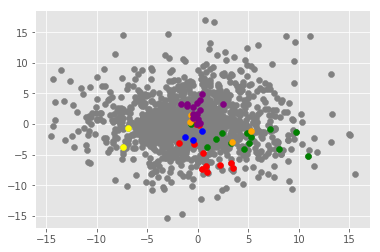

In [0]:
import mplcursors

with plt.style.context('ggplot'):
  fig, ax =plt.subplots()
  plt.scatter(matrix_red[:,0],matrix_red[:,1], color='grey')

#some proteins

  meat_pca=pca.transform(meat_matrix)
  plt.scatter(meat_pca[:,0],meat_pca[:,1],color='red')

#vegetables
  veg_pca=pca.transform(veg_matrix)
  plt.scatter(veg_pca[:,0],veg_pca[:,1],color='green')

#fish
  fish_pca=pca.transform(fish_matrix)
  plt.scatter(fish_pca[:,0],fish_pca[:,1],color='blue')

#carbs
  carb_pca=pca.transform(carb_matrix)
  plt.scatter(carb_pca[:,0],carb_pca[:,1],color='orange')

#tools
  tools_pca=pca.transform(tools_matrix)
  plt.scatter(tools_pca[:,0],tools_pca[:,1],color='yellow')

#fruit
  fruit_pca=pca.transform(fruit_matrix)
  plt.scatter(fruit_pca[:,0],fruit_pca[:,1],color='purple')

mplcursors.cursor(hover=True)

# maybe color proteins, vegetables, cooking tools
#first of all, maybe color just thre recipes


# To do for better visualization
#filter just the cooking ingredients
# either show result of clustering, or feed in a more comprehensive list of items

In [0]:
matrix_red.shape[0]

12233

In [0]:
selection = np.random.choice(matrix_red.shape[0], 5000, replace=False)


'in'

In [0]:
# it's taking too long to plot all the points
# so let's just display a few points

selection = np.random.choice(matrix_red.shape[0], 5000, replace=False)

fig, ax = plt.subplots()
points = ax.scatter(matrix_red[selection,0],matrix_red[selection,1],
                    s=100, alpha=0.3)

labels = [list(model.wv.vocab)[i] for i in selection]
tooltip = plugins.PointLabelTooltip(points, labels)

plugins.connect(fig, tooltip)
mpld3.display()

In [0]:
client = UsdaClient('AHwTWmpP3Qj5dia6lux4vX4e3ybNCw6r9wELd5z7')


In [0]:
proteins=client.search_foods('protein',10)
for _ in range(10):
  food_item=next(proteins)
  print(food_item)

PROTEIN WHOLE GRAIN PROTEIN SNACK, UPC: 722252219114
LUNA, PROTEIN, HIGH PROTEIN BAR, CHOCOLATE CHIP COOKIE DOUGH, UPC: 722252233035
BENEFIT NUTRITION, PROTEIN PLUS, SOY PROTEIN & MULTIGRAIN CEREAL, UPC: 607440123469
SUPREME PROTEIN, ACCELERATE MORNING PROTEIN BAR, STRAWBERRY BANANA, UPC: 639372233107
SUPREME PROTEIN, PROTEIN BAR, PEANUT BUTTER CRUNCH, UPC: 639372021216
SUPREME PROTEIN, PROTEIN BARS, UPC: 639372020202
SUPREME PROTEIN, HIGH PROTEIN BAR, PEANUT BUTTER CRUNCH, UPC: 639372025009
SUPREME PROTEIN, HIGH PROTEIN BAR, CARAMEL NUT CHOCOLATE, UPC: 639372025023
GRILLED WHITE MEAT CHICKEN, HUMMUS, WHITE CHEDDAR CHEESE, CELERY, AND NAAN ROUNDS PROTEIN PACK, EXCELLENT SOURCE OF PROTEIN, UPC: 052548589844
FERMENTED VEGAN PROTEIN+ PROTEIN BAR, UPC: 624777007927


In [0]:
model2.wv.save_word2vec_format('/content/drive/My Drive/data_science/recipes/word2vec_recipe_trained.bin',binary=True)


### How are pretrained word2vec model and the newly trained word2vec model different?

In [0]:
# both embed words into 300 dimensional vectors
# When we search for the most similar vectors to a given word,
# the pretrained model seems to return 'food belonging to that type'
# where as our newly trained model seems to return 'similar alternatives'

# this might simply be because the pretrained model was trained on a much larger
# text, so it's possible that there are just more words in the training set,
# like sirloin, prime rib, tenderloin, etc 

# I think this might be the case, becasue when we look for the top 15 most
# similar words, the words from the pretrained model have higher (closer to 1)
# cosine similarity than the words from the newly trained model 




In [0]:
model.similar_by_word('steak',topn=15,restrict_vocab=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('steaks', 0.7335855960845947),
 ('mediumrare', 0.6318039894104004),
 ('grain', 0.62589430809021),
 ('skirt', 0.5801817774772644),
 ('chops', 0.5784642696380615),
 ('tuna', 0.5364434719085693),
 ('rare', 0.5084277391433716),
 ('flank', 0.4908929765224457),
 ('lamb', 0.4829716980457306),
 ('doneness', 0.47728121280670166),
 ('board', 0.4552207291126251),
 ('chimichurri', 0.4465738534927368),
 ('thinly', 0.43752047419548035),
 ('pork', 0.43546849489212036),
 ('beef', 0.43059900403022766)]

In [0]:
model2.wv.similar_by_word('steak',topn=15,restrict_vocab=None)

In [0]:
model.similar_by_word('salad',topn=15,restrict_vocab=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dressing', 0.7964476346969604),
 ('vinaigrette', 0.7478728890419006),
 ('watercress', 0.7443512082099915),
 ('frisée', 0.7312421798706055),
 ('arugula', 0.7281455993652344),
 ('slaw', 0.7227060794830322),
 ('lettuce', 0.7075955867767334),
 ('radishes', 0.7064037322998047),
 ('salads', 0.7013168334960938),
 ('romaine', 0.6958824396133423),
 ('lettuces', 0.6395835876464844),
 ('avocado', 0.6316620707511902),
 ('jicama', 0.6269614100456238),
 ('endive', 0.6230140924453735),
 ('radicchio', 0.6111922264099121)]

In [0]:
model2.wv.most_similar('chicken',topn=15,restrict_vocab=None)

In [0]:
# this is implying that maybe we need to convert all plurals in to singulars

In [0]:
# What vegetable should I eat with lamb? or chicken? 
# asparagus is to steak as X is to chicken
#  vec(steak) -vec(asparagus)= vec(chicken) - vec(X)
# vec(X) = vec(chicken) + vec(asparagus)-vec(steak)

model2.similar_by_vector(model2['chicken']+model2['asparagus']-model2['steak'],topn=15,restrict_vocab=None)



In [0]:
model.similar_by_vector(model['lamb']+model['vegetable']-model['steak'],topn=15,restrict_vocab=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('vegetable', 0.5379717350006104),
 ('lamb', 0.5354306101799011),
 ('olive', 0.3948507606983185),
 ('shanks', 0.37691861391067505),
 ('parsnip', 0.37365537881851196),
 ('potato', 0.3590221405029297),
 ('squash', 0.35643401741981506),
 ('breadcrumb', 0.3527926802635193),
 ('casserole', 0.3448244333267212),
 ('depth', 0.3374180495738983),
 ('rosemary', 0.33438974618911743),
 ('herb', 0.3278125822544098),
 ('oxtail', 0.31896311044692993),
 ('butternut', 0.31194695830345154),
 ('cuminsalt', 0.30853623151779175)]

In [0]:
model.similar_by_vector(model['bacon'], topn= 15, restrict_vocab = None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bacon', 1.0),
 ('pancetta', 0.7798669338226318),
 ('crisp', 0.6605666875839233),
 ('rendered', 0.6293946504592896),
 ('chorizo', 0.5797315835952759),
 ('sausage', 0.5407482385635376),
 ('sausages', 0.5224363803863525),
 ('ham', 0.4978555738925934),
 ('fat', 0.47747671604156494),
 ('render', 0.4567064642906189),
 ('drippings', 0.4440554678440094),
 ('renders', 0.43891608715057373),
 ('cracklings', 0.4384816884994507),
 ('towels', 0.4244651794433594),
 ('duck', 0.4054550230503082)]

In [0]:
model2.similar_by_vector(model2['lamb']+model2['asparagus']-model2['steak'],topn=15,restrict_vocab=None)



In [0]:
model.similar_by_vector(model['lamb']+model['asparagus']-model['steak'],topn=15,restrict_vocab=None)
#

# hmm, the pretrained model seems to think that fruit (pears, grape, strawberries)
# should be paired with lamb, while the new model doesn't think so.

#why? 

In [0]:
model.similar_by_word('meat',topn=15,restrict_vocab=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bone', 0.7342758178710938),
 ('bones', 0.7142550349235535),
 ('leg', 0.6270058155059814),
 ('brisket', 0.5727496147155762),
 ('beef', 0.5679225921630859),
 ('loin', 0.5629754066467285),
 ('shoulder', 0.5611631274223328),
 ('marrow', 0.5462486743927002),
 ('duck', 0.5382863879203796),
 ('thigh', 0.5329949259757996),
 ('thickest', 0.5275232195854187),
 ('tail', 0.5267216563224792),
 ('part', 0.5200143456459045),
 ('veal', 0.5152628421783447),
 ('octopus', 0.5118818283081055)]

In [0]:
# Given an ingredient, say "lamb", can I return ingredients that pairs well with lamb?
# for example, find a nearby word that belongs in "vegetables"
# find a nearaby word that belongs in "wine"
# how to check if a word belongs to paraticular categories?

# For example, return vegetables, wine that pair well with lamb
# Or would this be eaasier to do just from counting the number of word pairs with lamb? 

In [0]:

ing = eval(df.at[1,'ingredients'])
for item in ing:
  print(item)
  # get rid of numbers (4 cups, 2 tablespoon)
  item = re.sub('[0-9]+','',item)

  # remove special characters
  item = re.sub('/|,|\(|\)','',item)

  item = item.lower()
  print(item)

1 1/2 cups whipping cream
  cups whipping cream
2 medium onions, chopped
 medium onions chopped
5 teaspoons salt
 teaspoons salt
3 bay leaves
 bay leaves
3 whole cloves
 whole cloves
1 large garlic clove, crushed
 large garlic clove crushed
1 teaspoon pepper
 teaspoon pepper
1/8 teaspoon ground nutmeg
 teaspoon ground nutmeg
Pinch of dried thyme, crumbled
pinch of dried thyme crumbled
8 large shallots, minced
 large shallots minced
1 tablespoon butter
 tablespoon butter
1 pound trimmed boneless center pork loin, sinew removed cut into 1-inch chunks, well chilled
 pound trimmed boneless center pork loin sinew removed cut into -inch chunks well chilled
3 eggs
 eggs
6 tablespoon all purpose flour
 tablespoon all purpose flour
1/4 cup tawny Port
 cup tawny port
3 tablespoons dried currants, minced
 tablespoons dried currants minced
Lettuce leaves
lettuce leaves
Cracked peppercorns
cracked peppercorns
Minced fresh parsley
minced fresh parsley
Bay leaves
bay leaves
French bread baguette slic

In [0]:
# cluster using only the ingredients
# find all words appearing in the ingredients
# create a giant list of all words that appear in "ingredients"
ingredients = []

for index in df.index:
  ing = eval(df.at[index,'ingredients'])
  ing_cleaned = []
  for item in ing:
    # get rid of numbers (4 cups, 2 tablespoon)
    item = re.sub('[0-9]+','',item)

    # remove special characters
    item = re.sub('/|,|\(|\)','',item)

    item = item.lower()

    ing_cleaned.append(item)
  df.at[index,'ingredients'] = ing_cleaned

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-258-1a97bed645fc>", line 4, in <module>
    ing = eval(df.at[index,'ingredients'])
TypeError: eval() arg 1 must be a string, bytes or code object

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.

TypeError: ignored

In [0]:
ingredients = []
for index in df.index:
  ing = df.at[index,'ingredients']
  for item in ing:
    ingredients += item.split()

In [0]:
ingredients = list(set(ingredients))

In [0]:
len(ingredients)

9399

In [0]:
# from the embedded words, find only the words that appear as ingredients
ing_list = [idx for idx, item in enumerate(list(model.wv.vocab.keys())) if item in ingredients]


In [0]:
ing_embed = embedding_matrix[ing_list,:]

In [0]:
ing_embed.shape

(4335, 300)

In [0]:
# Can I use "clusters"? As a way to tell if ingredient belongs in a particualr group? 
np.savetxt(directory + '/embeddeding.csv', embedding_matrix.T)


In [0]:
embedding_matrix.shape

(12233, 300)

In [0]:
# do a regular clustering


from sklearn.cluster import DBSCAN

In [0]:
clu = DBSCAN(eps = 1)
labels = clu.fit_predict(embedding_matrix)

In [0]:
np.unique(labels)

array([-1,  0])

In [0]:
from sklearn.cluster import AgglomerativeClustering


In [0]:
clu = AgglomerativeClustering(n_clusters = 9)
labels = clu.fit_predict(embedding_matrix)

In [0]:
# find exmaple words in clusters 
label1 = np.argwhere(labels == 9)
count = 0
while count <= 100 and count < len(label1):
  print(list(model.wv.vocab.keys())[label1[count][0]])
  count += 1



In [0]:
# label 0: seems to be associated with baking
# label 1: words for cooking technique
# label 2: words associated with meat cooking
# label 3: units (inch, cup, hours,)
# label 4: technique
# label 5: vegetable and spices
# label 6: measure (high, low, ...)
# label 7: numbers
# label 8: not sure


226

In [0]:
embedding_matrix.shape

(12233, 300)

In [0]:
np.squeeze(embedding_matrix[label_2,:]).shape

(468, 300)

In [0]:
# take label 0, 2, 5. Cluster again
label_2 = np.argwhere(labels == 2)
clu = AgglomerativeClustering(n_clusters = 9)
label_2_new = clu.fit_predict(np.squeeze(embedding_matrix[label_2,:]))


In [0]:

label_2[label1[5][0]]

array([72])

In [0]:
# find example words in clusters 
label1 = np.argwhere(label_2_new == 6)
count = 0
while count <= 50 and count < len(label1):
  print(list(model.wv.vocab.keys())[label_2[label1[count][0]][0]])
  count += 1


heat
oil
heavy
melt
batches
brown
bacon
crisp
towels
working
smoking
browned
nonstick
moderately
fat
batch
fry
repeat
melted
golden
same
manner


In [0]:
'boil' in ingredients

True

In [0]:
from sklearn.metrics import silhouette_score

In [0]:
# finding the right number of clusters
num_clusters =range(2,25)
silhouette_scores = []
n_samples = embedding_matrix.shape[0]
for k in num_clusters:

    clu = AgglomerativeClustering(n_clusters = k)
    labels = clu.fit_predict(ing_embed)
    
    # compute silhouette score
    s_score = silhouette_score(ing_embed, labels)
    silhouette_scores.append(s_score)

print(silhouette_scores)

[0.5783494538990019, 0.581604852057221, 0.5871719558602999, 0.5827401742891372, 0.5472033558469911, 0.5488224571307807, 0.5496684605671065, 0.5000214140499395, 0.5003599276864888, 0.5079868678577987, 0.5024440908416157, 0.5034721618946485, 0.5037500769603914, 0.5049802081949788, 0.5057008916037111, 0.5061264635401729, 0.49748716534448434, 0.4981737361731633, 0.49861300137231174, 0.49956188781079575, 0.4998734901205956, 0.5000935440903092, 0.5005218001738128]


In [0]:
# finding the right number of clusters
num_clusters =range(25,50)
silhouette_scores = []
n_samples = embedding_matrix.shape[0]
for k in num_clusters:

    clu = AgglomerativeClustering(n_clusters = k)
    labels = clu.fit_predict(embedding_matrix)
    
    # compute silhouette score
    s_score = silhouette_score(embedding_matrix, labels)
    silhouette_scores.append(s_score)

print(silhouette_scores)

[0.7509306441847945, 0.7510560138912189, 0.7512344679617065, 0.739995039761559, 0.7401990095771548, 0.740452870411332, 0.7086287025044441, 0.7086958655569305, 0.7088272520433807, 0.7091220400008496, 0.7091953412362909, 0.7094398138231689, 0.7099380906805234, 0.7100379367395516, 0.7104678756286539, 0.7107541301989179, 0.710803486137141, 0.7109895154412273, 0.7110488013908682, 0.7083589943146947, 0.708388334537034, 0.7084233045832845, 0.7089610642529278, 0.7090004569412472, 0.709111972411303]


In [0]:
#  kmeans clustering
clu = KMeans(n_clusters = 9)
labels = clu.fit_predict(ing_embed)

In [0]:
# find exmaple words in clusters 
label1 = np.argwhere(labels == 8)
count = 0
while count <= 50 and count < len(label1):
  print(list(model.wv.vocab.keys())[label1[count][0]])
  count += 1


combined
prepared
teaspoons
sesame


In [0]:
# finding the right number of clusters
num_clusters =range(1,20)
silhouette_scores = []
n_samples = embedding_matrix.shape[0]
for k in num_clusters:
    print(k)

    clu = KMeans(n_clusters = k)
    labels = clu.fit_predict(embedding_matrix)
    
    # compute silhouette score
    s_score = silhouette_score(embedding_matrix, labels)
    silhouette_scores.append(s_score)

print(silhouette_scores)

1


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-197-cae1d733923c>", line 11, in <module>
    s_score = silhouette_score(embedding_matrix, labels)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 228, in silhouette_samples
    check_number_of_labels(len(le.classes_), n_samples)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 35, in check_number_of_labels
    "to n_samples - 1 (inclusive)" % n_labels)
ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

During handling of the above exception, another exception 

ValueError: ignored

# LSTM

In [0]:
# check using GPU
import tensorflow as tf
print(tf.test.gpu_device_name())
# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

/device:GPU:0


## 1. Plain LSTM without our word2vec embedding



In [0]:
# Create a model that takes n=30 consecutive words as input and returns the next predicted word
n=30
features=[]
labels=[]

for item in encoded_recipes:
  for i in range(n,len(item),10): 
    features.append(item[i-30:i])
    labels.append(item[i])
    


In [0]:
len(labels)

491105

In [0]:
num_words

14419

In [0]:
# vectorize labels
y=np.zeros((len(labels),num_words),dtype=np.bool)

for i,j in enumerate(labels):
  y[i,j]=1


In [0]:
X=np.array(features)

In [0]:
X.shape

(296268, 30)

In [0]:
y.shape

(296268, 15721)

In [0]:
### Build network
model=Sequential()

#embedding
model.add(Embedding(input_dim=num_words+1, input_length=30,output_dim=300))

# recurrent layer
model.add(LSTM(128,return_sequences=False))

#output layer
model.add(Dense(num_words, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 300)           4716600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_1 (Dense)              (None, 15721)             2028009   
Total params: 6,964,257
Trainable params: 6,964,257
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X,y, test_size = 0.10, random_state = 36)

In [0]:
#from keras.callbacks import EarlyStopping, ModelCheckpoint

# Create callbacks
#callbacks = [EarlyStopping(monitor='val_loss', patience=5),ModelCheckpoint('model.h5',save_best_only=True,save_weights_only=False)]



In [0]:
# check using GPU
import tensorflow as tf
print(tf.test.gpu_device_name())
# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

/device:GPU:0


In [0]:
# create checkpoint every 5 epoch
 
checkpoint_path = "/content/drive/My Drive/data_science/recipes/checkpoints/epochs:{epoch:03d}-loss:{loss:.3f}-acc:{acc:.3f}-val_loss:{val_loss:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1,period=5)


# save all epoch loss and accuracy into a csv file 
csv_logger = CSVLogger("/content/drive/My Drive/data_science/recipes/checkpoints/model_history_log.csv", append=True)


In [0]:
history = model.fit(X_train,  Y_train, verbose=0,
                    batch_size=128, epochs=10,
                    callbacks=[cp_callback,csv_logger],
                    validation_data=(X_valid, Y_valid))

Instructions for updating:
Use tf.cast instead.

Epoch 00005: saving model to /content/drive/My Drive/data_science/recipes/checkpoints/epochs:005-loss:5.991-acc:0.063-val_loss:6.002-val_acc:0.064.hdf5

Epoch 00010: saving model to /content/drive/My Drive/data_science/recipes/checkpoints/epochs:010-loss:5.992-acc:0.063-val_loss:6.004-val_acc:0.064.hdf5


# 2. Character level generation



## 2.0 Data preparation 
Tokenize characters, create training and validation tests

In [0]:
t=Tokenizer(char_level=True) 
t.fit_on_texts(recipes_list)
encoded_recipes=t.texts_to_sequences(recipes_list)

index_to_ch=dict(map(reversed,t.word_index.items())) 

# function that converts a list of int to a list of characters
def int_to_ch(list_int):
    list_ch=[index_to_ch[i] for i in list_int]
    return(list_ch)

word_index_freq = { char : (t.word_index[char],sum(encoded_recipes[i].count(t.word_index[char]) for i in range(len(encoded_recipes)) )  ) for char in t.word_index}

# save the tokenizer
#with open('/content/drive/My Drive/data_science/recipes/char_tokenizer.pickle','wb') as handle:
#  pickle.dump(t, handle, protocol=pickle.HIGHEST_PROTOCOL)

print('number of characters: ', len(t.word_index))

number of characters:  67


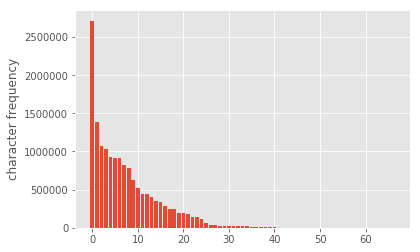

In [0]:
# plot characters according to frequency 
char_freq = [i[1] for i in list(word_index_freq.values())]

with plt.style.context('ggplot'):
  plt.bar(np.arange(len(t.word_index)),char_freq )
  plt.ylabel('character frequency')
  plt.show()

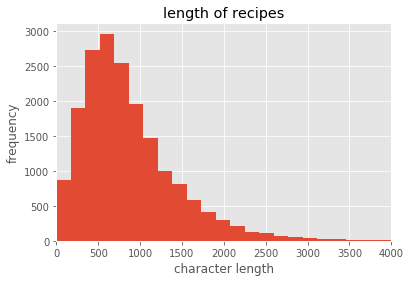

In [0]:
recipes_list=list(df.directions)
recipes_length=[len(i) for i in recipes_list]

with plt.style.context('ggplot'):
  plt.hist(recipes_length, bins=50)
  plt.xlim(0,4000)
  plt.xlabel('character length')
  plt.ylabel('frequency')
  plt.title('length of recipes')
  plt.show()

In [0]:
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 200
step = 10

sentences = []
next_chars = []
for item in encoded_recipes:
  if len(item)>=400:
    for i in range(0, len(item)-maxlen, step):
      sentences.append(item[i : i+maxlen])
      next_chars.append(item[i+ maxlen])
      
print('number of samples:', len(sentences))

number of samples: 1203317


In [0]:
## While practicing how to use h5py, load a subset of samples as training and validation to hhdf5 file 

In [0]:
X=np.array(sentences)

1203317

In [0]:
#vectorize y 

num_samples = len(next_chars)
num_char = len(t.index_word)


y = np.zeros((num_samples, num_char), dtype=np.bool)

for i, char in enumerate(next_chars):
  y[i,next_chars[i]-1]=1

In [0]:
# split training and validation
X_train, X_valid, Y_train, Y_valid = train_test_split(X,y, test_size = 0.10, random_state = 36)

In [0]:
file_path = '/content/drive/My Drive/data_science/recipes/char_data_length:'+str(maxlen)+'_step:'+str(step)+'.hdf5'
print(file_path)

with h5py.File(file_path, 'w') as f:
  # upload Y_train and Y_valid
  f.create_dataset('Y_train', dtype = np.bool, data = Y_train)
  f.create_dataset('Y_valid', dtype = np.bool, data = Y_valid)
  
  # vectorize X_valid and upload
  m, n = X_valid.shape
  X_valid_vec = np.zeros((m,maxlen, num_char), dtype=np.bool)
  for index, x in np.ndenumerate(X_valid):
    m,n = index
    X_valid_vec[m,n,x-1]=1

  f.create_dataset('X_valid', dtype=np.bool, data=X_valid_vec)
  del X_valid_vec
  
  # upload the train data in batches of size 100000 
  
  X_train_current = X_train[:100000,:]

  X_train_vec = np.zeros((100000, maxlen, num_char), dtype=np.bool)
  for index, x in np.ndenumerate(X_train_current):
    j,k = index
    X_train_vec[j,k,x-1] = 1
    
  dset = f.create_dataset('X_train',(100000, maxlen, num_char), maxshape=(None,maxlen, num_char), dtype=np.bool, data=X_train_vec)
    
    
  for i in range(100000,X_train.shape[0],100000):
    
    end = min(i+100000, X_train.shape[0])
    X_train_current = X_train[i:end,:]
  
    m, n = X_train_current.shape
    X_train_vec = np.zeros((m, maxlen, num_char), dtype=np.bool)
    for index, x in np.ndenumerate(X_train_current):
      j,k = index
      X_train_vec[j,k,x-1] = 1
  
    # append to dataset
    dset.resize((end,maxlen,num_char))
    dset[i:end,:,:]=X_train_vec
  
    

/content/drive/My Drive/data_science/recipes/char_data_length:200_step:10.hdf5


In [0]:
del X_train, X_valid, Y_train, Y_valid

In [0]:
# Check that all files have been saved correctly
with h5py.File(file_path, 'r') as f:
  for key in f.keys():
    print(key)
  print(f['X_train'].shape)
  print(f['Y_train'].shape)
  print(f['X_valid'].shape)
  print(f['Y_valid'].shape)



X_train
X_valid
Y_train
Y_valid
(1082985, 200, 67)
(1082985, 67)
(120332, 200, 67)
(120332, 67)


## 2.1 Build various LSTM models

In [0]:
maxlen = 200
num_char = 67
step = 10

model_name = '2_layer'
file_path = '/content/drive/My Drive/data_science/recipes/char_'+str(model_name)+'length_'+str(maxlen)+'_step_'+str(step)+'.hdf5'

In [0]:
# build the model: a single LSTM

#print('Build model...')
#model = Sequential()
#model.add(LSTM(128, input_shape=(maxlen, num_char)))
#model.add(LSTM(128))
#model.add(Dense(num_char, activation='softmax'))

#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])


# single LSTM 
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, num_char), return_sequences = True))
model.add(LSTM(128))
model.add(Dense(num_char, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

W0709 12:48:14.855808 139686968264576 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Build model...


In [0]:
#! Check that we are using GPU
# should print '/device:GPU:0'
print(tf.test.gpu_device_name())
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

/device:GPU:0


In [0]:
import datetime
datetime.timedelta(seconds=666)


datetime.timedelta(0, 666)

In [0]:
import datetime
datetime.timedelta(seconds=666)

import os
import time
# create checkpoint every epoch
 
checkpoint_path = "/content/drive/My Drive/data_science/recipes/checkpoints/char_double_LSTM_epochs_{epoch:03d}_2.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

# Save training time information
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()

# Save epoch loss and accuracy after each epoch
epoch_log_path = "/content/drive/My Drive/data_science/recipes/checkpoints/char_double_epoch_log.csv"
class log_epoch(tf.keras.callbacks.Callback):
  
  def on_train_begin(self, logs ={}):
    log_df = pd.DataFrame(columns=['epoch','training_time','loss','acc','val_loss','val_acc'])
    with open(epoch_log_path, 'a') as f:
      log_df.to_csv(f, header = True, index = False)
  
  def on_epoch_end(self, epoch, logs={}): 
    log_df = pd.DataFrame({'epoch':[epoch+1], 
                           'training_time':[str(datetime.timedelta(seconds=time_callback.times[-1]))],
                           'loss':[logs['loss']],
                           'acc':[logs['acc']],
                           'val_loss':[logs['val_loss']],
                           'val_acc':[logs['val_acc']]})
    with open(epoch_log_path, 'a') as f:
      log_df.to_csv(f, header=False, index = False)    
 

epoch_logger = log_epoch()  
        
# save all epoch loss and accuracy into a csv file 
csv_logger = CSVLogger("/content/drive/My Drive/data_science/recipes/checkpoints/char_double_LSTM_model_history.csv", append=True)


In [0]:
file_path ='/content/drive/My Drive/data_science/recipes/char_data_length_'+str(maxlen)+'_step_'+str(step)+'.hdf5'
from keras.utils import HDF5Matrix
X_train = HDF5Matrix(file_path, 'X_train')
Y_train = HDF5Matrix(file_path, 'Y_train')
X_valid = HDF5Matrix(file_path, 'X_valid')
Y_valid = HDF5Matrix(file_path, 'Y_valid')


In [0]:
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

In [0]:
# to continue training from a past epoch, load model first

model.load_weights('/content/drive/My Drive/data_science/recipes/checkpoints/char_double_LSTM_epochs_005.hdf5')

In [0]:
num_epochs=10
history = model.fit(X_train,  Y_train, verbose=1,
                    batch_size=128, 
                    shuffle="batch", #required when using HDF5 input
                    epochs=num_epochs,
                    callbacks=[cp_callback,time_callback, epoch_logger, csv_logger],
                    validation_data=(X_valid, Y_valid)) # for some reason, X_train, Y_train can be HDF5Matrix, but X_valid, Y_valid has to be numpy arrays

Train on 1082985 samples, validate on 120332 samples


W0709 12:58:14.140865 139686968264576 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
1082880/1082985 [============================>.] - ETA: 0s - loss: 1.0045 - acc: 0.6965
Epoch 00001: saving model to /content/drive/My Drive/data_science/recipes/checkpoints/char_double_LSTM_epochs_001_2.hdf5
1082985/1082985 [==============================] - 9673s 9ms/sample - loss: 1.0045 - acc: 0.6965 - val_loss: 1.0153 - val_acc: 0.6945
Epoch 2/10
1082880/1082985 [============================>.] - ETA: 0s - loss: 0.9793 - acc: 0.7032
Epoch 00002: saving model to /content/drive/My Drive/data_science/recipes/checkpoints/char_double_LSTM_epochs_002_2.hdf5
1082985/1082985 [==============================] - 9773s 9ms/sample - loss: 0.9793 - acc: 0.7032 - val_loss: 0.9988 - val_acc: 0.6999
Epoch 3/10
1082880/1082985 [============================>.] - ETA: 0s - loss: 0.9595 - acc: 0.7085
Epoch 00003: saving model to /content/drive/My Drive/data_science/recipes/checkpoints/char_double_LSTM_epochs_003_2.hdf5
1082985/1082985 [==============================] - 9679s 9ms/sample - lo

In [0]:
# load model 

[3.5532047748565674, 3.2489523887634277]

In [0]:

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(num_epochs),history.history['acc'],label = 'training accurracy')
ax1.plot(np.arange(num_epochs),history.history['val_acc'],label='validation accuracy')
ax1.set_title('accuracy')
ax1.legend(loc='upper left')

ax2.plot(np.arange(num_epochs),history.history['loss'],label = 'training loss')
ax2.plot(np.arange(num_epochs),history.history['val_loss'],label='validation loss')
ax2.set_title('loss')
ax2.legend(loc = 'upper right')

NameError: ignored

### Try generating some sample text
1. using deterministic method
2. using probabilistic method

NOTE: need to load tokenizer (that has been saved as char_tokenizer)

In [0]:
maxlen = 200
num_char = 67
step = 10

model_name = '2_layer'
file_path ='/content/drive/My Drive/data_science/recipes/char_data_length_'+str(maxlen)+'_step_'+str(step)+'.hdf5'

In [0]:
# load validation data

from keras.utils import HDF5Matrix

X_valid = HDF5Matrix(file_path, 'X_valid')
X_valid = np.array(X_valid)
Y_valid = HDF5Matrix(file_path, 'Y_valid')
Y_valid = np.array(Y_valid)



In [0]:

# load model from epoch 9
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, num_char), return_sequences = True))
model.add(LSTM(128))
model.add(Dense(num_char, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

model.load_weights('/content/drive/My Drive/data_science/recipes/checkpoints/char_double_LSTM_epochs_004_2.hdf5')

W0711 16:42:27.898247 140323528730496 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.evaluate(X_valid, Y_valid)

120332/120332 [==============================] - 461s 4ms/sample - loss: 1.0066 - acc: 0.6995


[1.0066287290921963, 0.6994565]

In [0]:
recipes_list=list(df.directions)

In [0]:
# define a function that generates sample recipes 


  # function that converts a list of int to a list of characters


def generate_recipes(model, window_size, num_recipes, num_characters, validation_info):

  # Pick #num_recipes random recipes 
  # generate the next #num_characters characters
  
  # load tokenizer
  with open('/content/drive/My Drive/data_science/recipes/char_tokenizer.pickle','rb') as handle: 
    tokenizer = pickle.load(handle)
 
  recipes_list=list(df.directions)
  recipes_length=[len(i) for i in recipes_list]
  index_100 = [i for i,e in enumerate(recipes_length) if e > window_size ] # index of recipes with lenght greater than 100
  selection = random.sample(index_100,num_recipes) 

  recipes_list = df.loc[selection,'directions'].tolist()

  # tokenize
  encoded_text = tokenizer.texts_to_sequences(recipes_list)
  
  index_to_ch=dict(map(reversed,tokenizer.word_index.items()))   
  
  text_100 = [i[:window_size] for i in encoded_text] # first 100 characters in each text
  text = np.array(text_100)
  generated_text = text

  # generate the next 200 characters 
  for i in range(num_characters):
  
    # vectorize 
    text = generated_text[:,-window_size:] # take the last 100 characters
    m, n = text.shape

    X = np.zeros((m, maxlen, num_char), dtype = np.bool)
    for index, x in np.ndenumerate(text):
      j, k = index
      X[j,k,x] = 1

    pred = model.predict(X)
    next_char = np.argmax(pred, axis=1).reshape(num_recipes,-1)
    generated_text = np.append(generated_text, next_char, axis = 1 )
  
  # model info
  if validation_info == 'True':
    valid = model.evaluate(X_valid, Y_valid)
    print('model validation loss: ', valid[0], ' validation accuracy: ', valid[1])
  
  # generate text
  print('Generating recipe \n')
  
  for i in range(num_recipes):
    
    test_integers = generated_text[i,:window_size].tolist()
    test_char = [index_to_ch[j] for j in test_integers]
    test_str = ''.join(test_char)
    print('Beginning: ', test_str)
  
    gen_integers = generated_text[i,window_size:].tolist()
    gen_char = [index_to_ch[j+1] for j in gen_integers] 
    # this is just how we saved the data...
    gen_str = ''.join(gen_char)
    print('Generated: ', gen_str ,'\n')
  

In [0]:
# Sample next character

def sample(preds, num_recipes, num_characters):
    # note: preds here is a numpy array of size (num_diversity, num_features)
    # compute softmax with temperature
    # note the output is already the softmax 
    
    diversity = np.array([0.2, 0.5, 0.7, 1, 1.2])
    
    preds = np.asarray(preds).astype('float64')
    
    preds = np.log(preds) / diversity[:,None]
    exp_preds = np.exp(preds)
    
    row_sum = np.sum(exp_preds, axis = 1 )
    preds = exp_preds / row_sum[:,None]
    
    probas = np.zeros((num_recipes,1))
    for number in range(num_recipes):
      sampling = np.random.multinomial(1,preds[number,:],1) 
      probas[number,0] = np.argmax(sampling)
    return probas.astype(int)

def diversity_generate_recipes(model, window_size, num_recipes, num_characters, validation_info):
  
  # load tokenizer
  with open('/content/drive/My Drive/data_science/recipes/char_tokenizer.pickle','rb') as handle: 
    tokenizer = pickle.load(handle)
 
  recipes_list=list(df.directions)
  recipes_length=[len(i) for i in recipes_list]
  index_100 = [i for i,e in enumerate(recipes_length) if e > window_size ] # index of recipes with lenght greater than 100
  selection = random.sample(index_100,num_recipes) 

  recipes_list = df.loc[selection,'directions'].tolist()

  # tokenize
  encoded_text = tokenizer.texts_to_sequences(recipes_list)
  index_to_ch=dict(map(reversed,tokenizer.word_index.items()))   
  
  text_100 = [i[:window_size] for i in encoded_text] # first 100 characters in each text
  text = np.array(text_100)
  
  for num in range(num_recipes):
    generated_text = text[num,-window_size:]
    generated_text = np.array([generated_text,]*5)
    

    # generate the next 200 characters with varying temperature values 
    for i in range(num_characters):
  
    # vectorize 
      input_text = generated_text[:,-window_size:] # take the last 100 characters
      m, n = input_text.shape
      
      X = np.zeros((m, maxlen, num_char), dtype = np.bool)
      for index, x in np.ndenumerate(input_text):
        j, k = index
        X[j,k,x] = 1
    
      pred = model.predict(X)
      next_char = sample(pred, num_recipes, num_characters)
      generated_text = np.append(generated_text, next_char, axis = 1 )

    #print
    test_integers = text[num,:window_size].tolist()
    test_char = [index_to_ch[j] for j in test_integers]
    test_str = ''.join(test_char)
    
    print('Beginning text: ', test_str)
    
    diversity = [ 0.2, 0.5, 0.7, 1, 1.2]
    for item in range(5):
      print('Generated text with diversity ', diversity[item])
      gen_integers = generated_text[item,window_size:].tolist()
      gen_char = [index_to_ch[j+1] for j in gen_integers] 
      gen_str = ''.join(gen_char)
      print('Generated: ', gen_str ,'\n')
  
    
  # model info
  if validation_info == 'True':
    valid = model.evaluate(X_valid, Y_valid)
    print('model validation loss: ', valid[0], ' validation accuracy: ', valid[1])
  
 



In [0]:
generate_recipes(model, 200, 5, 200, 'False')

KeyboardInterrupt: ignored

In [0]:
diversity_generate_recipes(model, 200,5,200,False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


Beginning text:  combine diced mango, yogurt, 1 cup ice cubes, milk, honey, vanilla extract, ground cinnamon, and ground cardamom in blender. puree until smooth. pour smoothie into 2 glasses. garnish each glass with m
Generated text with diversity  0.2
Generated:  re. sprinkle with salt and pepper. cook until cooked through, about 1 hour. transfer to a boil and cook until cooked through, about 10 minutes. transfer to a bowl and chill. cook until the sauce in a  

Generated text with diversity  0.5
Generated:  re at room temperature to taste in a small bowl and simmer before serving. turn the bacon, beat the salmon fish to coat completely. transfer to a beans, then butter and chilled. set aside. mix in pans 

Generated text with diversity  0.7
Generated:  re. whisk together running dish. press to pepper to served the pot, until jalapeño in a bowl with remaining onion, then sprinkle strips in heavy oil in a small bowl until fish. using large skillet ove 

Generated text with diversity  1

In [0]:
preds = p[0,:]
preds = np.asarray(preds).astype('float64')
    
preds = np.log(preds) / 1
exp_preds = np.exp(preds)

np.argmax(np.random.multinomial(1,preds,1))
    
 

66

In [0]:
T / np.array([1,2,3])[:,None]

array([[0.        , 1.        , 2.        ],
       [0.        , 0.5       , 1.        ],
       [0.        , 0.33333333, 0.66666667]])

## 2 b. Character level generation with keras fit_generator

In [0]:
# define generator function
def recipe_generator(input_path,batch_size):  
  X_train = HDF5Matrix(input_path, 'X_train') 
  Y_train = HDF5Matrix(input_path, 'Y_train')
  
  size = X_train.end # number of total training samples
  idx = 0
  
  while True:
    if idx >= size:
      idx = idx % size
    if idx + batch_size > size :
      last_batch = True
    else :
      last_batch = False
    
    if last_batch == True:
      end = size
    else:
      end = idx + batch_size
        
    yield X_train[idx:end], Y_train[idx:end] # might have to make this into numpy array
     
    idx = end

0

In [0]:
maxlen = 100
num_char = 145


# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, num_char)))
model.add(Dense(num_char, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

Build model...


NameError: ignored

In [0]:
import os
# create checkpoint every epoch
 
checkpoint_path = "/content/drive/My Drive/data_science/recipes/checkpoints/fit_gen_char_smalldata_epochs:{epoch:03d}.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1,period=1)


# save all epoch loss and accuracy into a csv file 
csv_logger = CSVLogger("/content/drive/My Drive/data_science/recipes/checkpoints/fit_gen_char_smalldata_model_history_log.csv", append=True)


W0625 16:53:02.225396 139838071351168 callbacks.py:875] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


In [0]:
from keras.utils import HDF5Matrix
X_train = HDF5Matrix('/content/drive/My Drive/data_science/recipes/small_data.hdf5', 'X_train')
Y_train = HDF5Matrix('/content/drive/My Drive/data_science/recipes/small_data.hdf5', 'Y_train')
X_valid = HDF5Matrix('/content/drive/My Drive/data_science/recipes/small_data.hdf5', 'X_valid')
Y_valid = HDF5Matrix('/content/drive/My Drive/data_science/recipes/small_data.hdf5', 'Y_valid')

training_size = X_train.end

180000

In [0]:

input_path='/content/drive/My Drive/data_science/recipes/small_data.hdf5'
batch_size = 180 
spe=training_size // batch_size
epoch_num = 10

history = model.fit_generator(recipe_generator(input_path, batch_size),
                              steps_per_epoch= spe,
                              validation_data=(X_valid, Y_valid),
                              callbacks=[cp_callback,csv_logger],
                              epochs=epoch_num
                             )

Epoch 1/2
 999/1000 [============================>.] - ETA: 0s - loss: 2.7276 - acc: 0.2486
Epoch 00001: saving model to /content/drive/My Drive/data_science/recipes/checkpoints/fit_gen_char_smalldata_epochs:001.hdf5
1000/1000 [==============================] - 193s 193ms/step - loss: 2.7273 - acc: 0.2486 - val_loss: 2.3921 - val_acc: 0.3061
Epoch 2/2
 999/1000 [============================>.] - ETA: 0s - loss: 2.2666 - acc: 0.3488
Epoch 00002: saving model to /content/drive/My Drive/data_science/recipes/checkpoints/fit_gen_char_smalldata_epochs:002.hdf5
1000/1000 [==============================] - 189s 189ms/step - loss: 2.2665 - acc: 0.3488 - val_loss: 2.1589 - val_acc: 0.3839


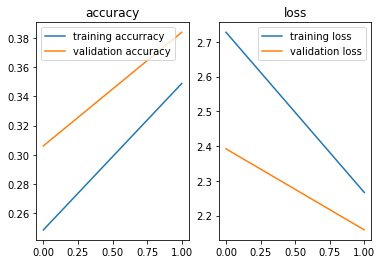

In [0]:
# plot history

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(epoch_num),history.history['acc'],label = 'training accurracy')
ax1.plot(np.arange(epoch_num),history.history['val_acc'],label='validation accuracy')
ax1.set_title('accuracy')
ax1.legend(loc='upper left')

ax2.plot(np.arange(epoch_num),history.history['loss'],label = 'training loss')
ax2.plot(np.arange(epoch_num),history.history['val_loss'],label='validation loss')
ax2.set_title('loss')
ax2.legend(loc = 'upper right')





# 3. Word level generation

## 3.0 Data preparation

Add space between words and punctuations 

Tokenize

Embed

In [0]:
df = pd.read_csv('/content/drive/My Drive/data_science/recipes/dataframe.csv')
df = df.astype(str)


In [0]:
# add spacing in word boundaries
for index in df.index:
  item = re.sub(r'\b',' ',df.at[index,'directions'])
  item = re.sub(' +',' ',item)
  df.at[index,'directions'] = item

In [0]:
# tokenize 
recipes=df['directions'].tolist() 

In [0]:
t=Tokenizer(filters='')  # filters are empty to allow punctuations like , . ; 
t.fit_on_texts(recipes)
encoded_recipes=t.texts_to_sequences(recipes)

In [0]:
# Convert encoded document into document of strings

#t.word_index: dictionary word:index
# create a reverse dictionary of index : words
index_to_words=dict(map(reversed,t.word_index.items())) 

# function that converts a list of int to a list of words
def int_to_word(list_int):
    list_words=[index_to_words[i] for i in list_int]
    return(list_words)

# Convert encoded document into document of strings
#s=list(map(int_to_word,encoded_recipes))
#int_to_word(encoded_recipes[0])

In [0]:
num_word = len(t.word_index)
print('number of words:',len(t.word_index))

number of words: 12233


In [0]:
# save tokenizer 

with open('/content/drive/My Drive/data_science/recipes/word_tokenizer.pickle','wb') as handle:
  pickle.dump(t, handle, protocol=pickle.HIGHEST_PROTOCOL)

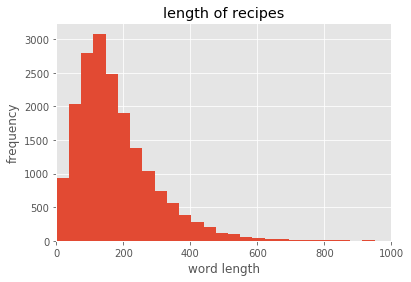

In [0]:
recipes_list=list(df.directions)
recipes_length=[len(i.split()) for i in recipes_list]

with plt.style.context('ggplot'):
  plt.hist(recipes_length, bins=50)
  plt.xlim(0,1000)
  plt.xlabel('word length')
  plt.ylabel('frequency')
  plt.title('length of recipes')
  plt.show()

In [0]:
# use 30 words 
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 30
step = 5

sentences = []
next_word = []
for item in encoded_recipes:
  if len(item)>=maxlen:
    for i in range(0, len(item)-maxlen, step):
      sentences.append(item[i : i+maxlen])
      next_word.append(item[i+ maxlen])
      
print('number of samples:', len(sentences))

number of samples: 552161


In [0]:
X = np.array(sentences)
y = np.array(next_word)

In [0]:
# split training and validation
X_train, X_valid, Y_train, Y_valid = train_test_split(X,y, test_size = 0.10, random_state = 36)

In [0]:
# save data 
# note: y has been turned into proper array form 

file_path = '/content/drive/My Drive/data_science/recipes/word_length_'+str(maxlen)+'_step_'+str(step)+'.hdf5'


def vectorize_Y(y):
    m = y.shape[0]
    num_word = len(t.index_word)
  
    y_array = np.zeros((m, num_word), dtype = np.bool)
    y_list = list(y)
  
    for i, word in enumerate(y_list):
      y_array[i, y_list[i]-1] = 1
  
    return y_array
  

with h5py.File(file_path, 'w') as f:
  # upload Y_train and Y_valid
  f.create_dataset('X_train', dtype = np.bool, data = X_train)
  f.create_dataset('X_valid', dtype = np.bool, data = X_valid)
  
  # upload Y_train 
  Y_train_array = vectorize_Y(Y_train)
  f.create_dataset('Y_train', dtype = np.bool, data = Y_train_array)
  del Y_train_array

  # upload Y_valid
  Y_valid_array = vectorize_Y(Y_valid)
  f.create_dataset('Y_valid', dtype = np.bool, data = Y_valid_array)
  del Y_valid_array

  


In [0]:

# this does manual one-hot encoding
#def vectorize_X(X):
#  m,n = X.shape
#  num_word = len(t.index_word)

#  X_array = np.zeros((m,maxlen, num_word), dtype=np.bool)
#  for index, x in np.ndenumerate(X):
#    j,k = index
#    X_array[j,k,x-1]=1

#  return X_array
  

def vectorize_Y(y):
    m = y.shape[0]
    num_word = len(t.index_word)
  
    y_array = np.zeros((m, num_word), dtype = np.bool)
    y_list = list(y)
  
    for i, word in enumerate(y_list):
      y_array[i, y_list[i]-1] = 1
  
    return y_array
  

In [0]:
# file path of one-hot encoding
#file_path = '/content/drive/My Drive/data_science/recipes/word_data_length_'+str(maxlen)+'_step_'+str(step)+'.hdf5'
#print(file_path)

/content/drive/My Drive/data_science/recipes/word_data_length_30_step_5.hdf5


In [0]:
# vectorize 
#file_path = '/content/drive/My Drive/data_science/recipes/word_data_length_'+str(maxlen)+'_step_'+str(step)+'.hdf5'
#print(file_path)


#f = h5py.File(file_path, 'w')

# upload Y_train 
#Y_train_array = vectorize_Y(Y_train)
#f.create_dataset('Y_train', dtype = np.bool, data = Y_train_array)
#del Y_train_array

# upload Y_valid
#Y_valid_array = vectorize_Y(Y_valid)
#f.create_dataset('Y_valid', dtype = np.bool, data = Y_valid_array)
#del Y_valid_array

# upload X_valid in chunks
#X_valid_current = X_valid[:20000,:]
#X_valid_array = vectorize_X(X_valid_current)   
#dset = f.create_dataset('X_valid',(20000, maxlen, num_word), maxshape=(None,maxlen, num_word), dtype=np.bool, data=X_valid_array)  
#del X_valid_array

#for i in range(20000,X_valid.shape[0],20000):
    
#    end = min(i+20000, X_valid.shape[0])
#    X_valid_current = X_valid[i:end,:]
#    X_valid_array = vectorize_X(X_valid_current)
  
    # append to dataset
#    dset.resize((end,maxlen,num_word))
#    dset[i:end,:,:]=X_valid_array
  
#    del X_valid_array

   
# upload X_train in chunks
#X_train_current = X_train[:20000,:]
#X_train_array = vectorize_X(X_train_current)   
#dset = f.create_dataset('X_train',(20000, maxlen, num_word), maxshape=(None,maxlen, num_word), dtype=np.bool, data=X_train_array)  
#del X_train_array

#for i in range(20000,X_train.shape[0],20000):
    
#    end = min(i+20000, X_train.shape[0])
#    X_train_current = X_train[i:end,:]
#    X_train_array = vectorize_X(X_train_current)
  
    # append to dataset
#    dset.resize((end,maxlen,num_word))
#    dset[i:end,:,:]=X_train_array
  
#    del X_train_array
    
    
#f.close()

/content/drive/My Drive/data_science/recipes/word_data_length_30_step_5.hdf5


In [0]:
# Check that all files have been saved correctly
with h5py.File(file_path, 'r') as f:
  for key in f.keys():
    print(key)
#  print(f['X_train'].shape)
#  print(f['Y_train'].shape)
#  print(f['X_valid'].shape)
#  print(f['Y_valid'].shape)

X_train
X_valid
Y_train
Y_valid


## 3.1 Single LSTM layer with embedding

In [0]:
num_word

12233

In [0]:
num_word = len(t.word_index)

In [0]:
# single LSTM 
print('Build model...')
model = Sequential()
model.add(Embedding(num_word,300,input_length = 30))
model.add(LSTM(256, return_sequences = True))
model.add(LSTM(256))
model.add(Dense(num_word, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

Build model...


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 300)           3669900   
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 256)           570368    
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_2 (Dense)              (None, 12233)             3143881   
Total params: 7,909,461
Trainable params: 7,909,461
Non-trainable params: 0
_________________________________________________________________


In [0]:
# turn Y_train, Y_valid into one-hot encoding
from keras.utils import HDF5Matrix
X_train = HDF5Matrix(file_path, 'X_train')
X_valid = HDF5Matrix(file_path, 'X_valid')
Y_train = HDF5Matrix(file_path, 'Y_train')
Y_valid = HDF5Matrix(file_path, 'Y_valid')

X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

In [0]:
# Check that we are using GPU before training

# should print '/device:GPU:0'
print(tf.test.gpu_device_name())
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

/device:GPU:0


In [0]:
import datetime
datetime.timedelta(seconds=666)

import os
import time
# create checkpoint every epoch
 
checkpoint_path = "/content/drive/My Drive/data_science/recipes/checkpoints/word_embedding_LSTM_epochs_{epoch:03d}_2.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

# Save training time information
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()

# Save epoch loss and accuracy after each epoch
epoch_log_path = "/content/drive/My Drive/data_science/recipes/checkpoints/word_embedding_LSTM_epoch_log.csv"
class log_epoch(tf.keras.callbacks.Callback):
  
  def on_train_begin(self, logs ={}):
    log_df = pd.DataFrame(columns=['epoch','training_time','loss','acc','val_loss','val_acc'])
    with open(epoch_log_path, 'a') as f:
      log_df.to_csv(f, header = True, index = False)
  
  def on_epoch_end(self, epoch, logs={}): 
    log_df = pd.DataFrame({'epoch':[epoch+1], 
                           'training_time':[str(datetime.timedelta(seconds=time_callback.times[-1]))],
                           'loss':[logs['loss']],
                           'acc':[logs['acc']],
                           'val_loss':[logs['val_loss']],
                           'val_acc':[logs['val_acc']]})
    with open(epoch_log_path, 'a') as f:
      log_df.to_csv(f, header=False, index = False)    
 

epoch_logger = log_epoch()  
        
# save all epoch loss and accuracy into a csv file 
csv_logger = CSVLogger("/content/drive/My Drive/data_science/recipes/checkpoints/word_embedding_LSTM_model_history.csv", append=True)


In [0]:
num_epochs=60
history = model.fit(X_train, Y_train, verbose=1,
                    batch_size=128, 
                    shuffle="batch", #required when using HDF5 input
                    epochs=num_epochs,
                    callbacks=[cp_callback,time_callback, epoch_logger, csv_logger],
                    validation_data=(X_valid, Y_valid)) # for some reason, X_train, Y_train can be HDF5Matrix, but X_valid, Y_valid has to be numpy arrays

Train on 496944 samples, validate on 55217 samples
Epoch 1/60
496896/496944 [============================>.] - ETA: 0s - loss: 5.9624 - acc: 0.0735
Epoch 00001: saving model to /content/drive/My Drive/data_science/recipes/checkpoints/word_embedding_LSTM_epochs_001_2.hdf5
496944/496944 [==============================] - 496s 999us/sample - loss: 5.9623 - acc: 0.0735 - val_loss: 5.9597 - val_acc: 0.0752
Epoch 2/60
496896/496944 [============================>.] - ETA: 0s - loss: 5.9296 - acc: 0.0735
Epoch 00002: saving model to /content/drive/My Drive/data_science/recipes/checkpoints/word_embedding_LSTM_epochs_002_2.hdf5
496944/496944 [==============================] - 470s 946us/sample - loss: 5.9295 - acc: 0.0735 - val_loss: 5.9596 - val_acc: 0.0752
Epoch 3/60
496896/496944 [============================>.] - ETA: 0s - loss: 5.9291 - acc: 0.0734
Epoch 00003: saving model to /content/drive/My Drive/data_science/recipes/checkpoints/word_embedding_LSTM_epochs_003_2.hdf5
496944/496944 [=====

KeyboardInterrupt: ignored

In [0]:
X_train.shape

(496944, 30)

In [0]:
Y_train.shape

(496944, 12233)

In [0]:
X_valid.shape

(55217, 30)

In [0]:
Y_valid.shape

(55217, 12233)